All the cells must be in continuation @Samar (ie - file must be reproducible)

please include references in the code @Samar

and some questions as well that can be asked in the final showdown

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer



In [4]:
from scipy.stats import probplot

In [3]:
# main df
train_df = pd.read_csv('C:\\Users\\Shree123\\Practicum_project\\Data\\train.csv')

test_df = pd.read_csv('C:\\Users\\Shree123\\Practicum_project\\Data\\test.csv')

# train_df = pd.read_csv('Data/train.csv')

# test_df = pd.read_csv('Data/test.csv')

In [4]:
train_df.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
50142,80844,14821,7,William Jamesl,17.0,378918909.0,Accountant,19895.90,1384.991667,5.0,...,Standard,2600.04,27.973646,167.0,Yes,66.388434,54.231236,Low_spent_Small_value_payments,292.536571,Poor
26049,44707,24681,2,Jessica Toonkels,15.0,294999171.0,Journalist,31327.28,2427.606667,9.0,...,Standard,1819.09,35.315502,161.0,Yes,65.640664,48.252565,Low_spent_Small_value_payments,358.958518,Poor
16109,29795,17029,6,Karolinaj,51.0,967331628.0,Accountant,19271.95,1536.995833,6.0,...,Standard,368.72,27.407272,391.0,Yes,35.046789,55.992235,Low_spent_Medium_value_payments,280.046604,Standard
41336,67638,11576,1,ra Alperm,24.0,975007794.0,Musician,48409.17,4021.097500,8.0,...,Standard,2120.20,26.649917,166.0,Yes,98.658792,43.058335,High_spent_Medium_value_payments,404.759055,Standard
43807,71341,31400,8,Yues,28.0,990796246.0,Media_Manager,14383.03,1109.585833,8.0,...,Bad,2350.45,28.202758,144.0,Yes,51.364476,62.935241,Low_spent_Large_value_payments,235.231522,Poor


In [5]:
test_df.sample(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
3695,16721,8175,12,Cruiseb,21.0,146418269.0,Journalist,20066.60,1732.216667,7.0,...,9.0,Standard,491.75,24.236466,218.0,Yes,45.605384,20.650286,Low_spent_Small_value_payments,308.615293
23378,75772,28722,11,Emiq,31.0,826686064.0,Doctor,36463.21,2947.600833,6.0,...,7.0,Standard,914.86,41.171686,277.0,Yes,0.000000,75.636259,Low_spent_Small_value_payments,452.555812
4093,17919,7377,10,Poornimao,45.0,949936591.0,Engineer,51200.46,4108.705000,7.0,...,9.0,Bad,4126.76,33.493182,163.0,Yes,151.502271,34.706649,High_spent_Medium_value_payments,452.509423
19596,64430,34147,9,Melc,18.0,762826147.0,Teacher,67503.36,5542.280000,7.0,...,6.0,Standard,323.93,31.057284,234.0,No,36.817027,65.980188,High_spent_Large_value_payments,652.821581
47761,148923,48216,10,Sierrai,33.0,115001071.0,Teacher,21205.72,1556.143333,3.0,...,2.0,Good,327.83,25.885507,335.0,No,20.007886,59.050012,Low_spent_Small_value_payments,359.554987


In [6]:
# Shape of train and test dataframes
train_df.shape , test_df.shape

((100000, 28), (50000, 27))

1) EDA

In [7]:
# data types 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [8]:
# remove unecessary features
train_df.drop(columns = ['ID','Customer_ID','SSN','Name'] , inplace = True)

test_df.drop(columns = ['ID','Customer_ID','SSN','Name'] , inplace = True)

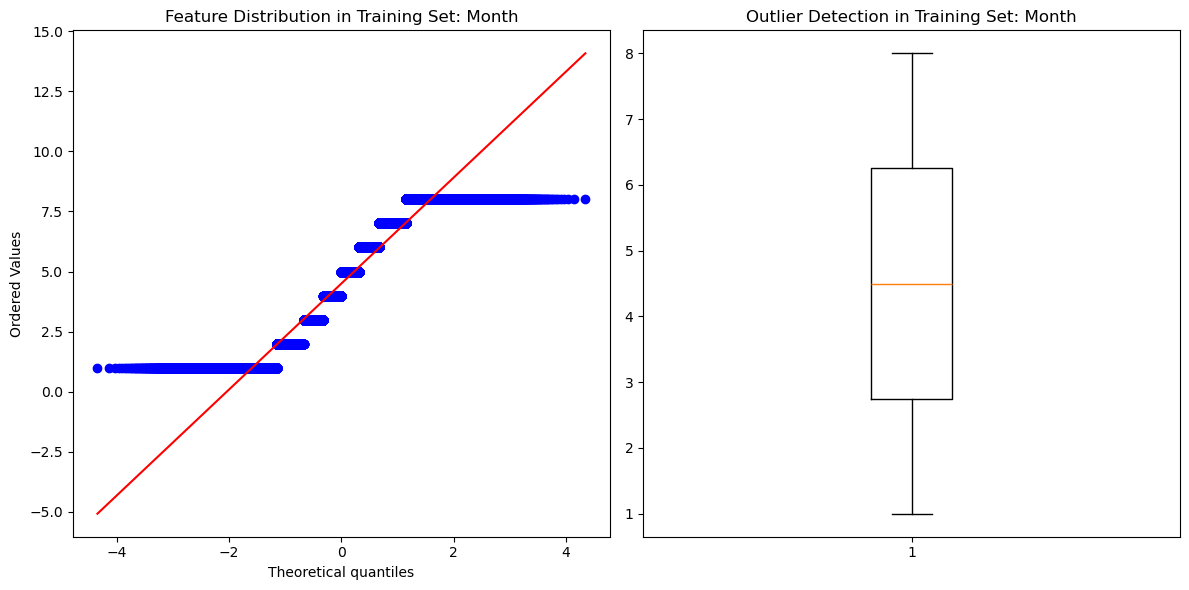

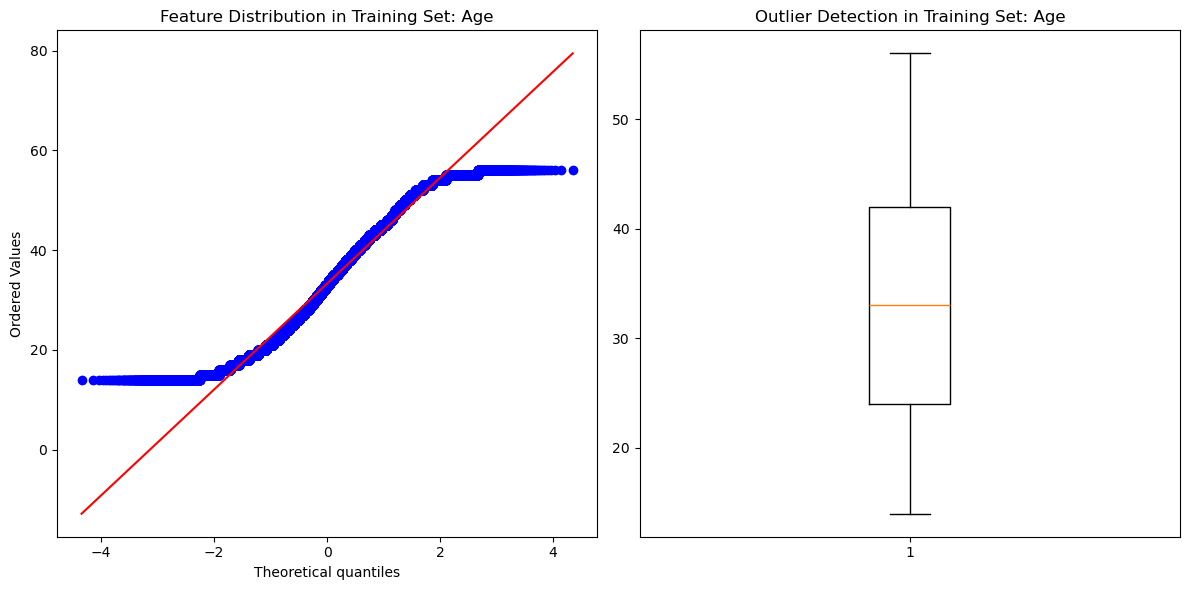

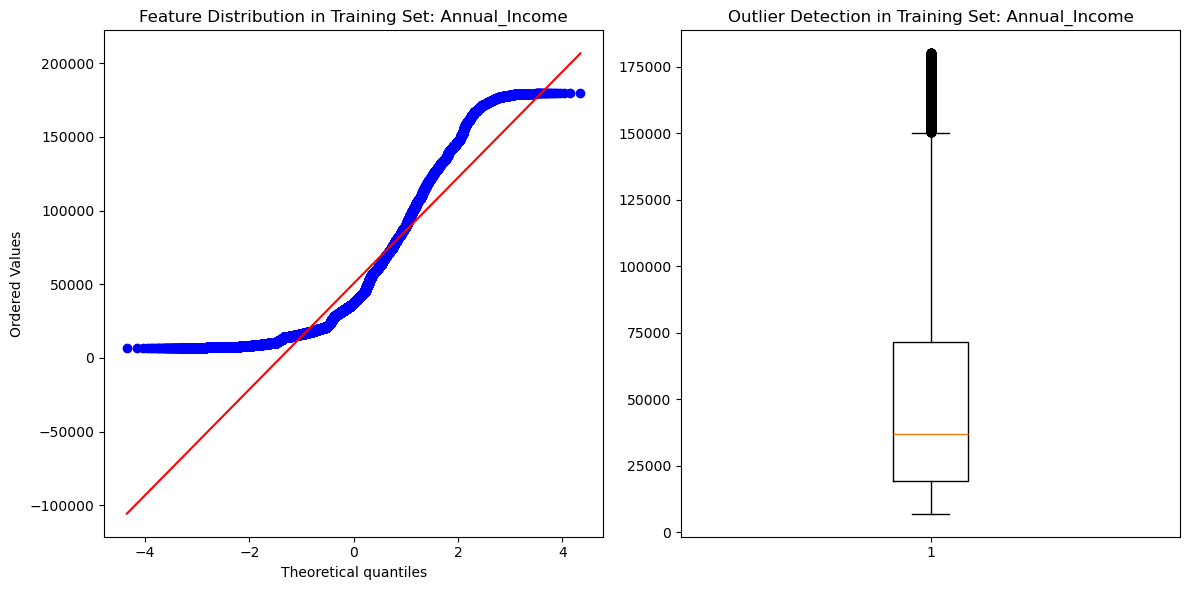

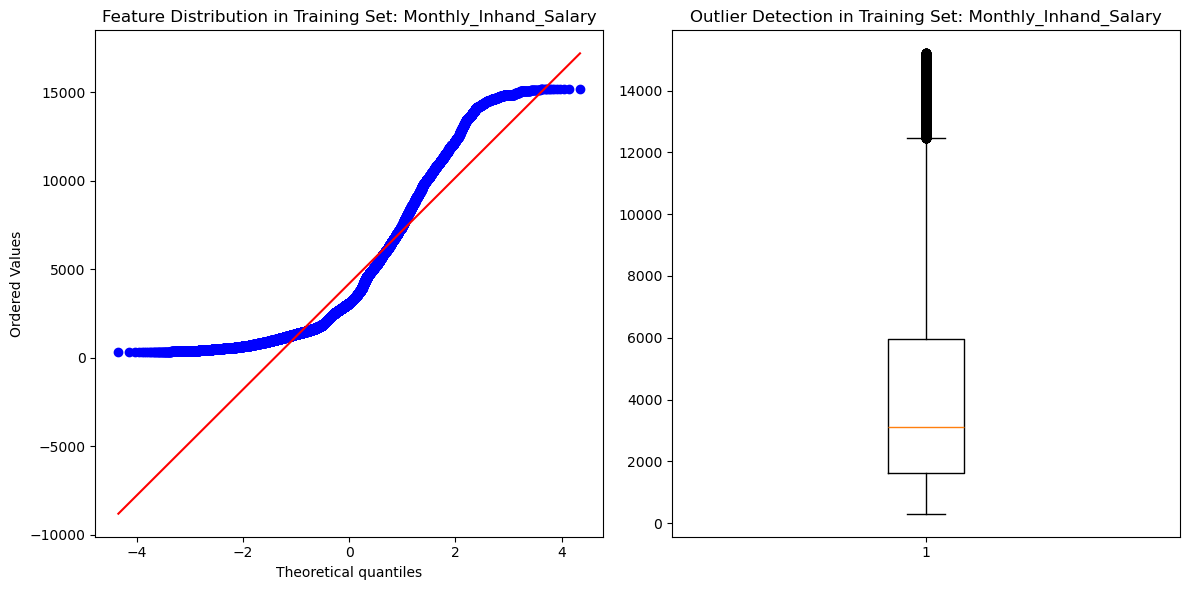

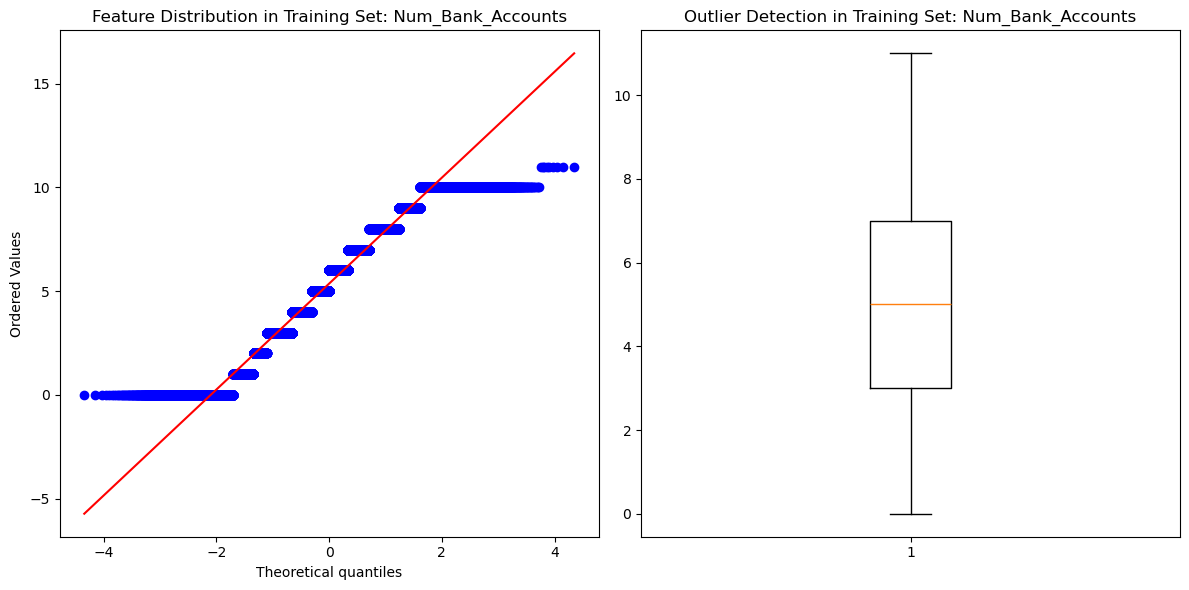

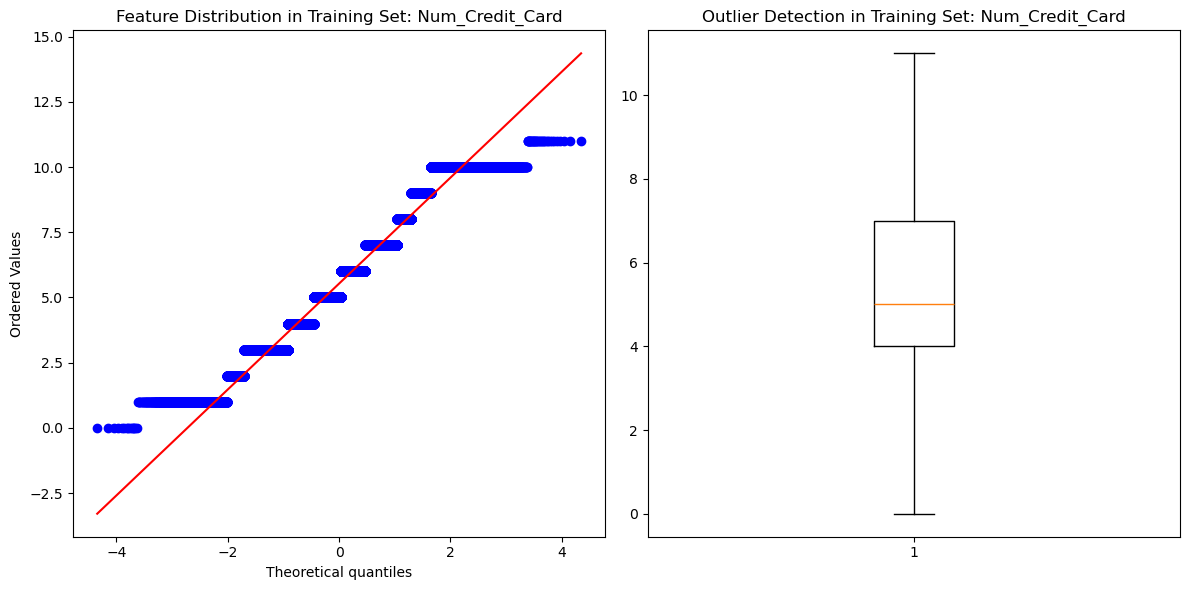

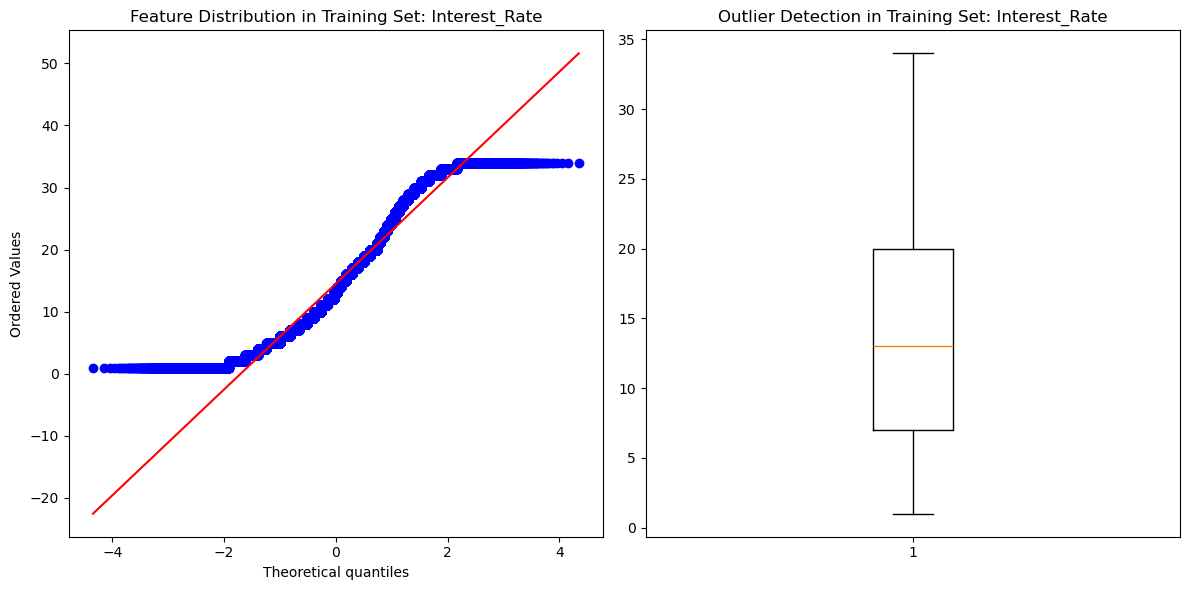

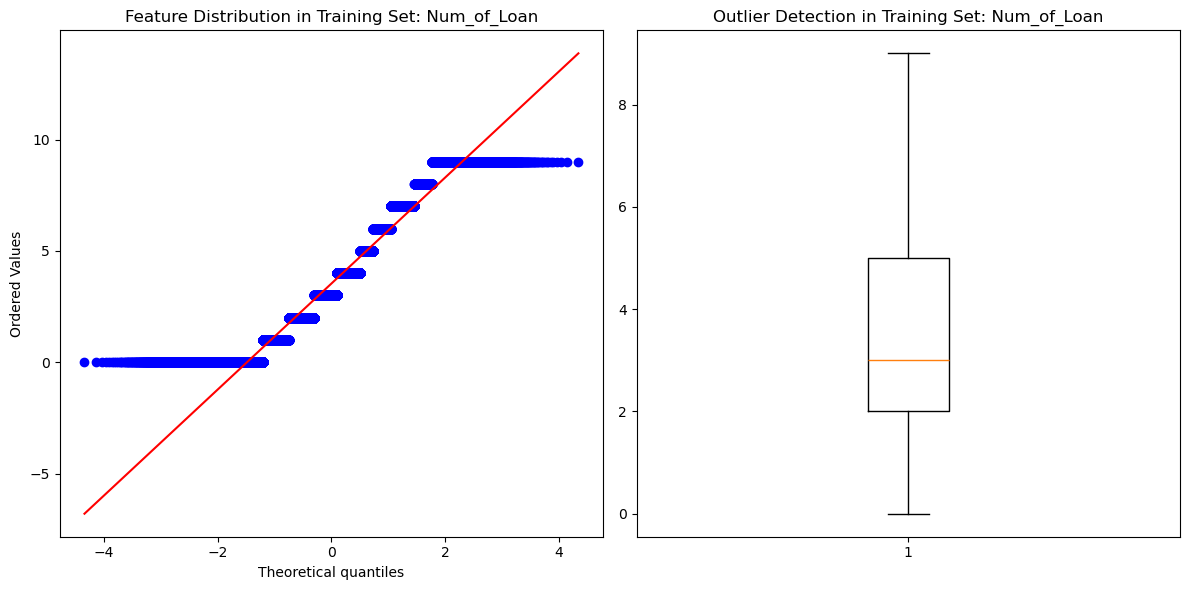

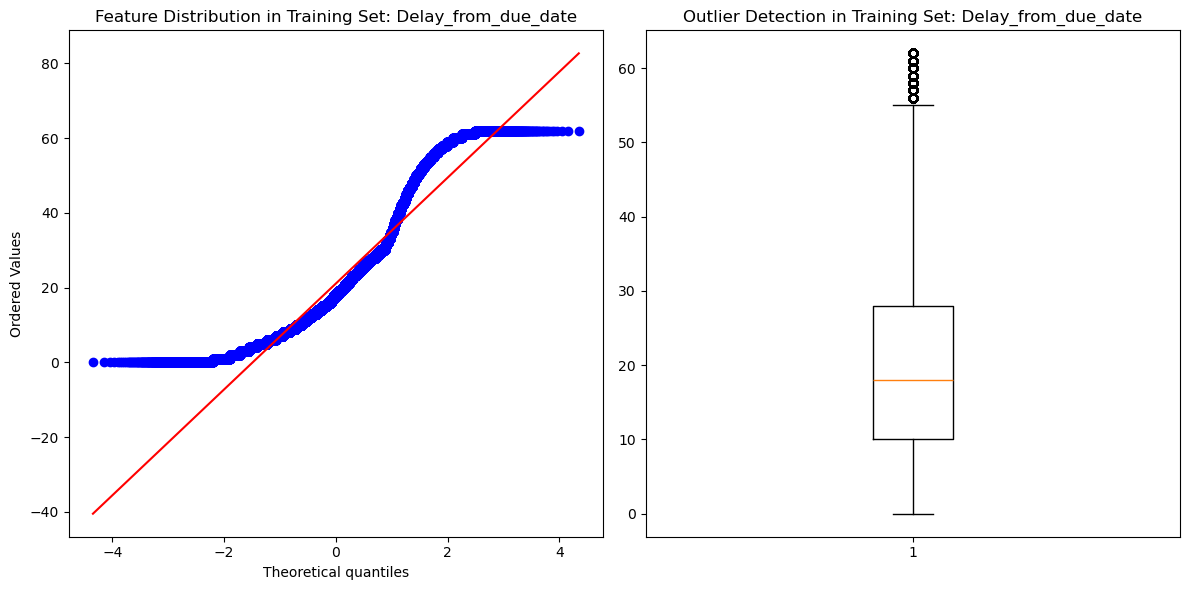

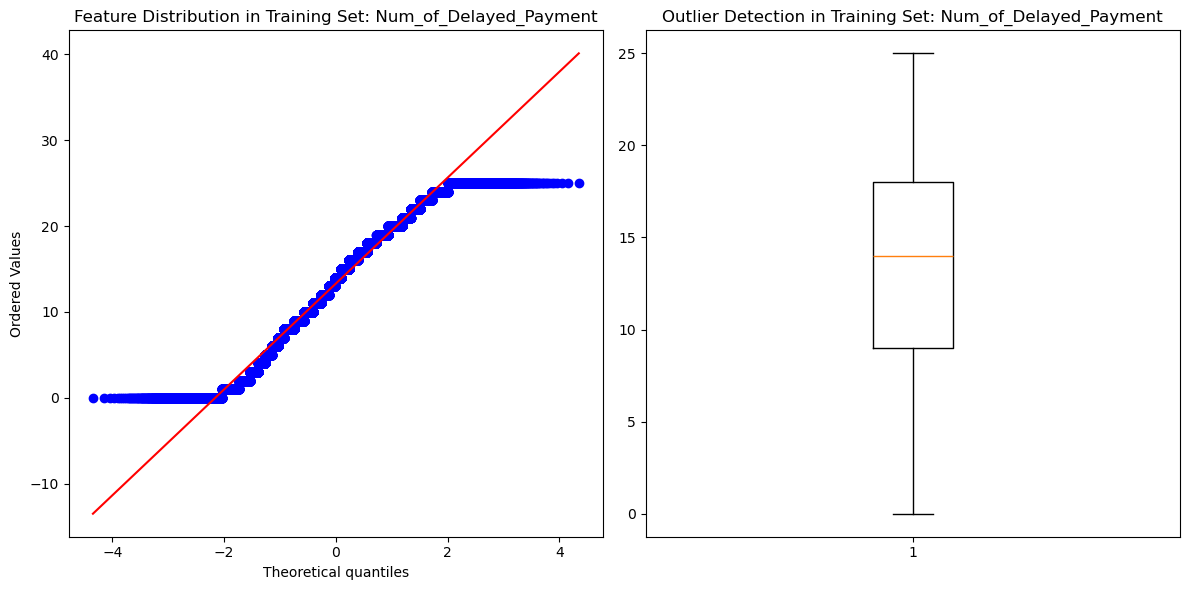

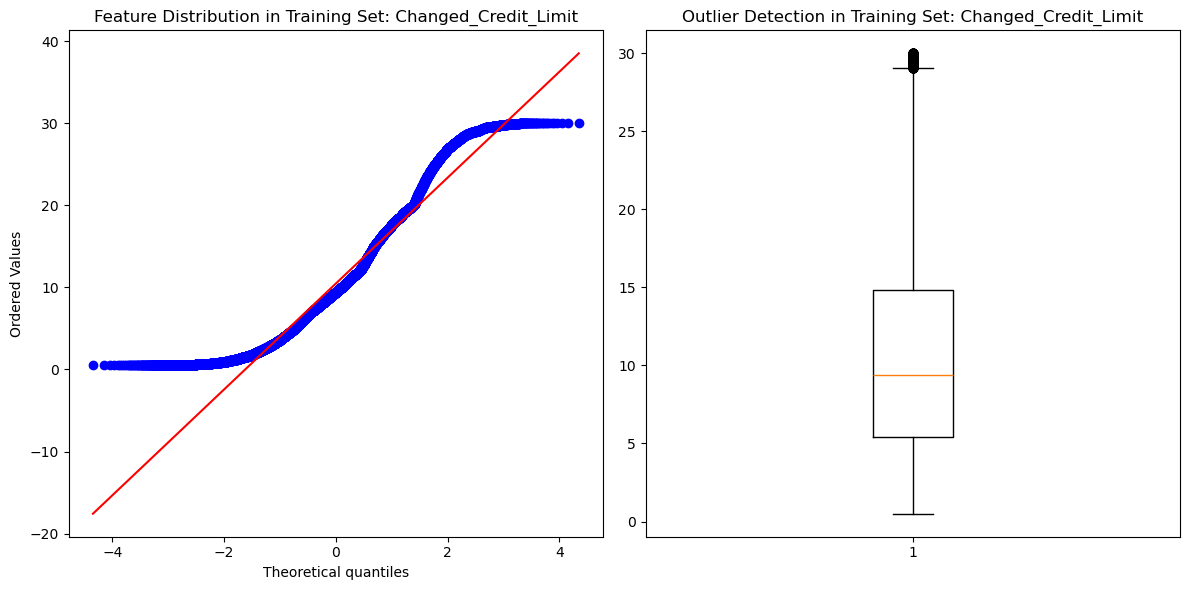

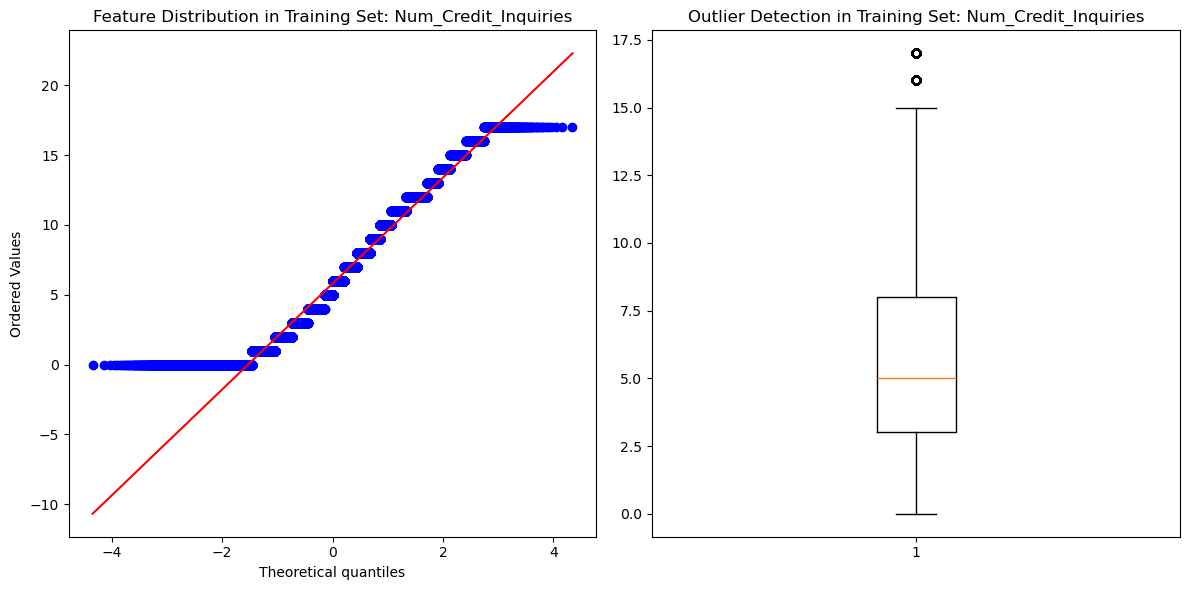

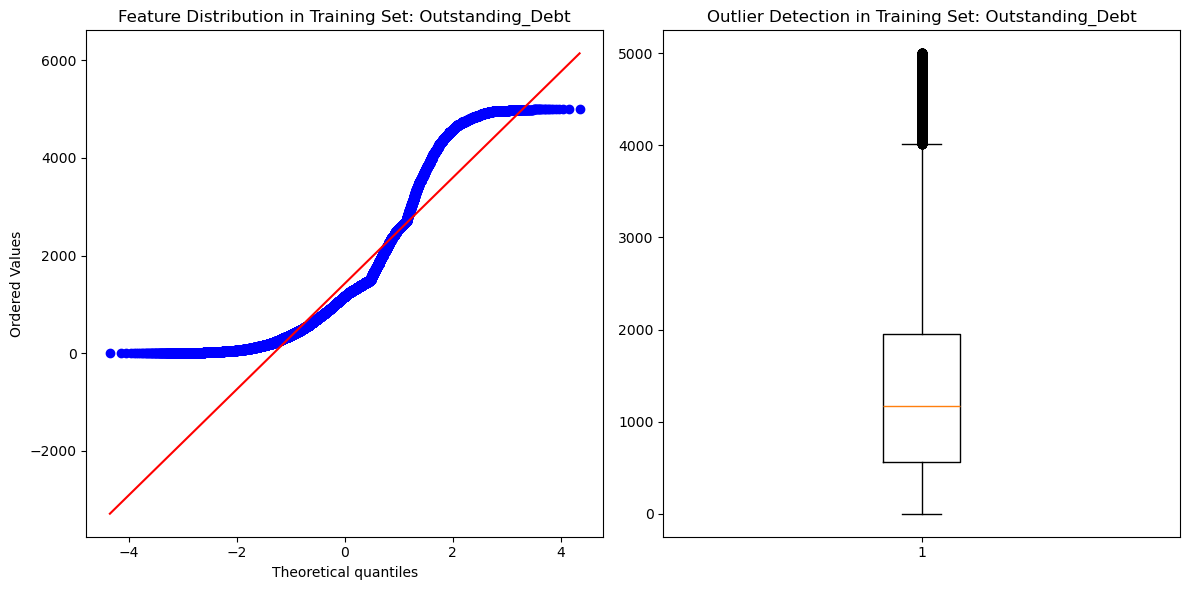

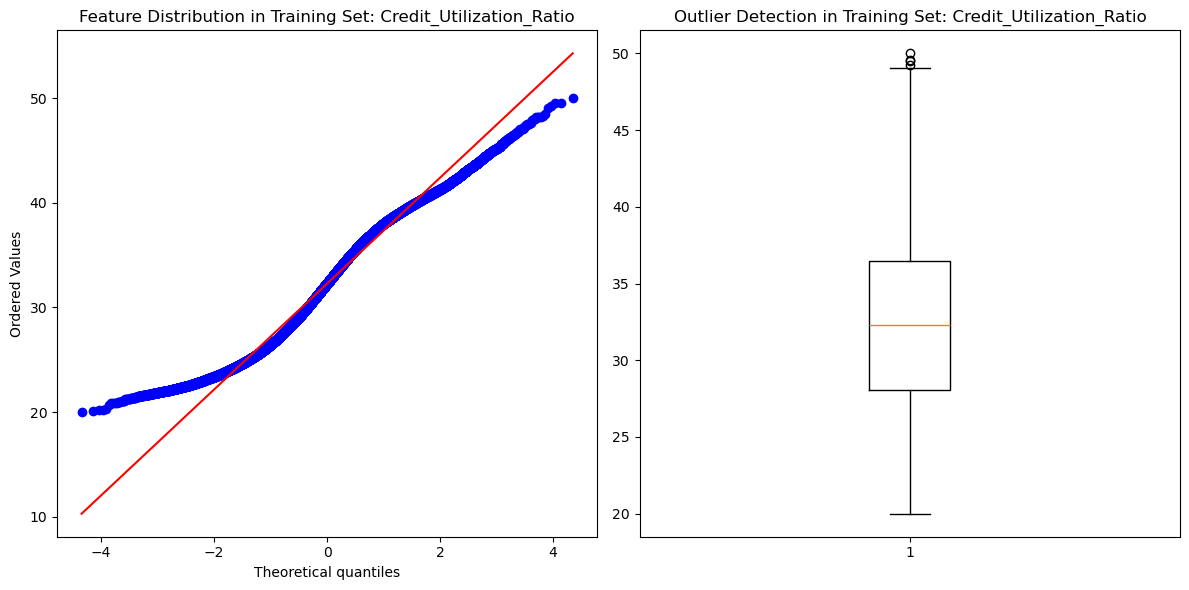

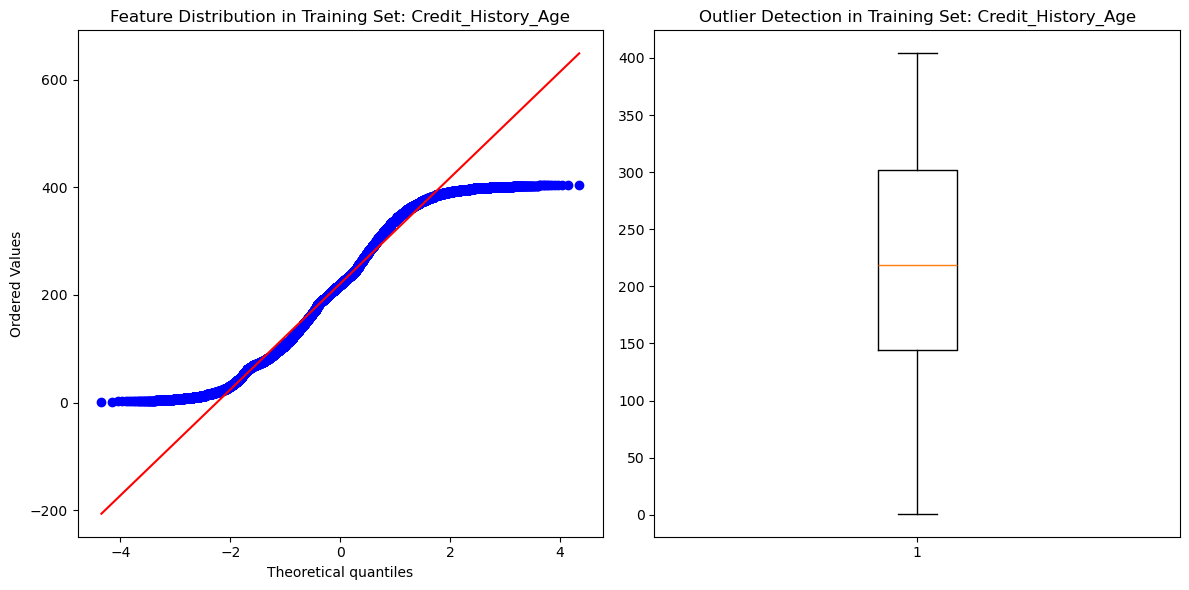

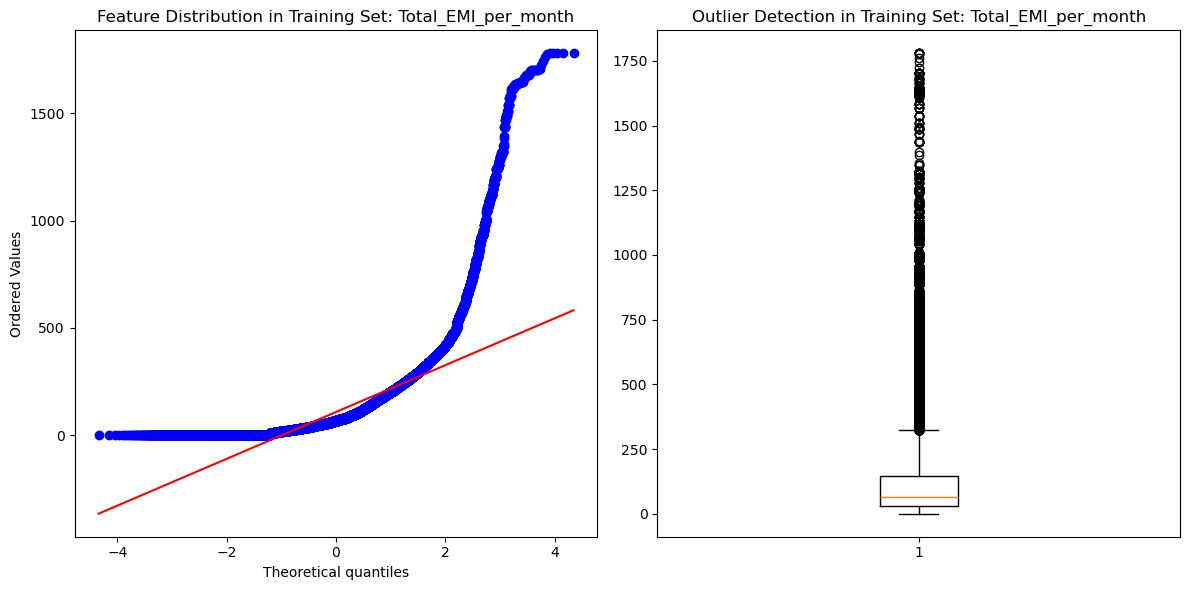

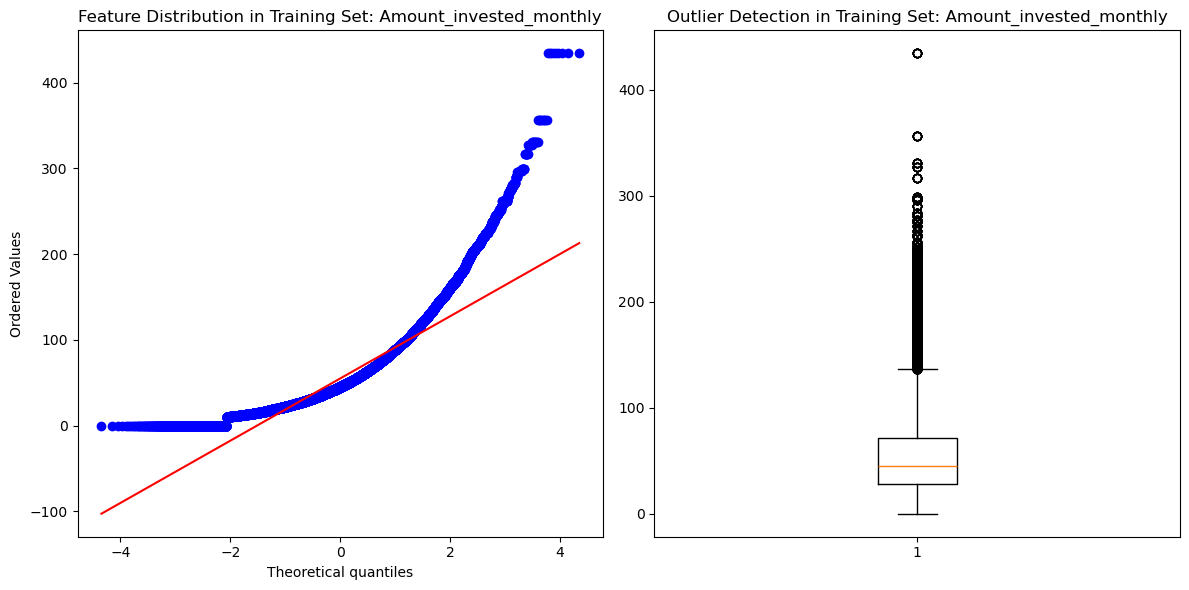

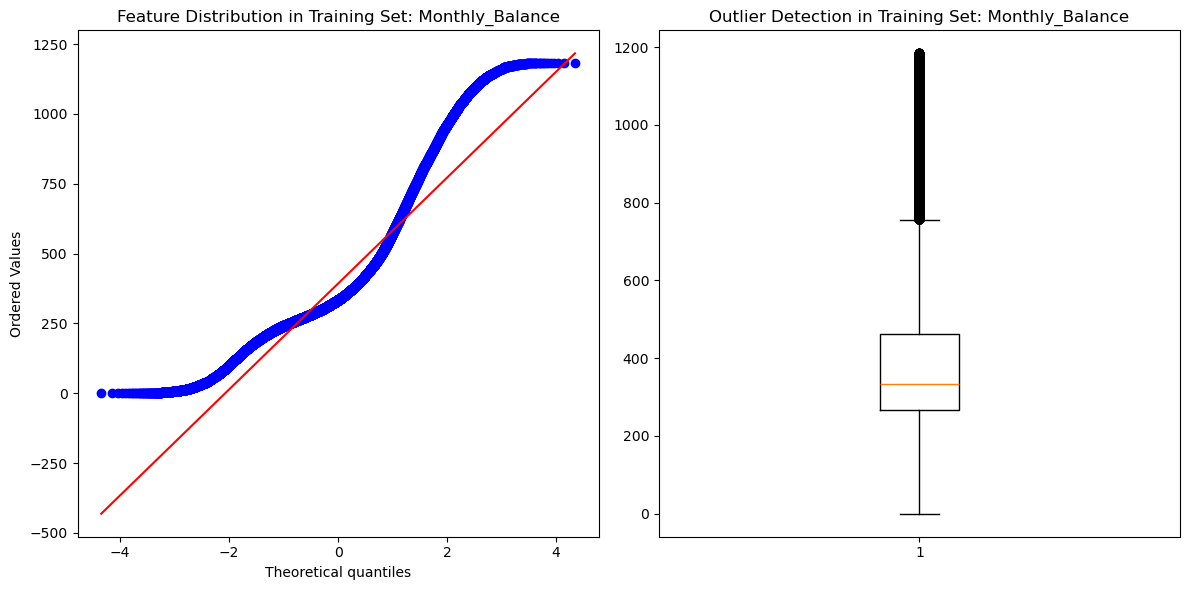

In [9]:
# Distribution of all the numeric features
numeric_df_train = train_df.select_dtypes(include = 'number')
numeric_df_test = test_df.select_dtypes(include = 'number')

for col in numeric_df_train:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    probplot(numeric_df_train[col], plot=plt)
    plt.title(f'Feature Distribution in Training Set: {col}')
    
    plt.subplot(122)
    plt.boxplot(numeric_df_train[col])
    plt.title(f'Outlier Detection in Training Set: {col}')
    
    plt.tight_layout()
    plt.show()

Inferences/ Results/ Conclusion : 

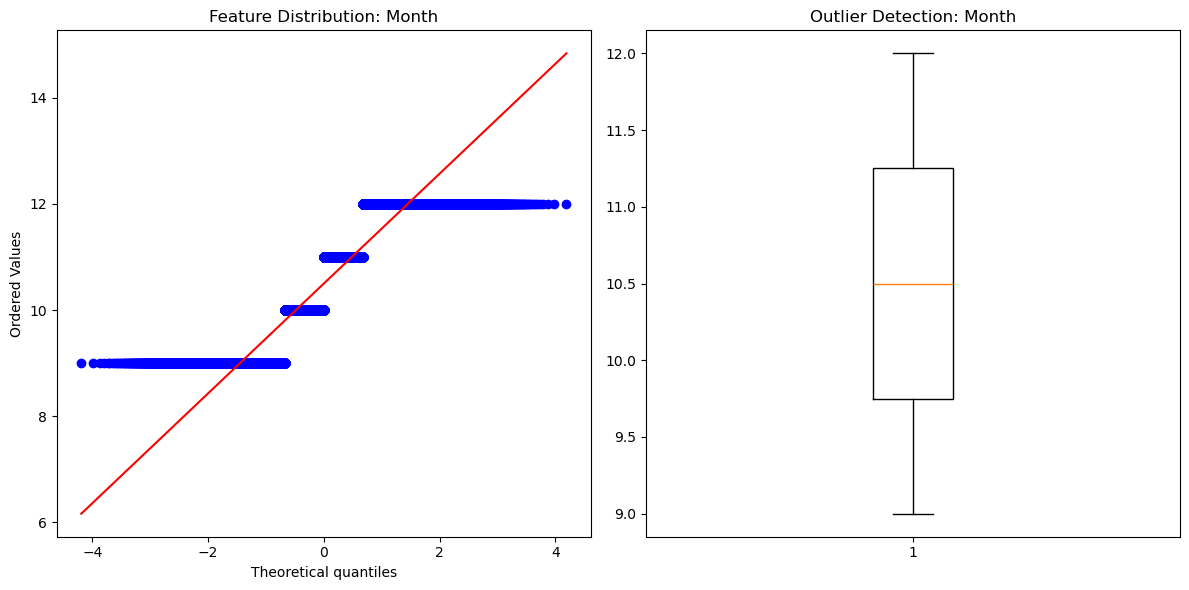

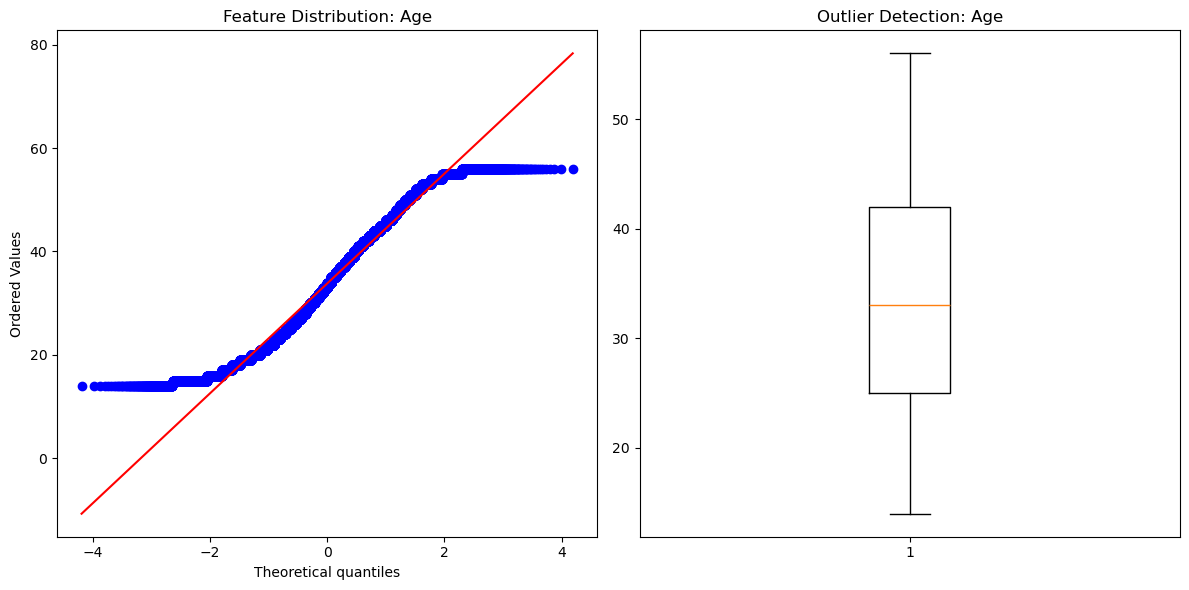

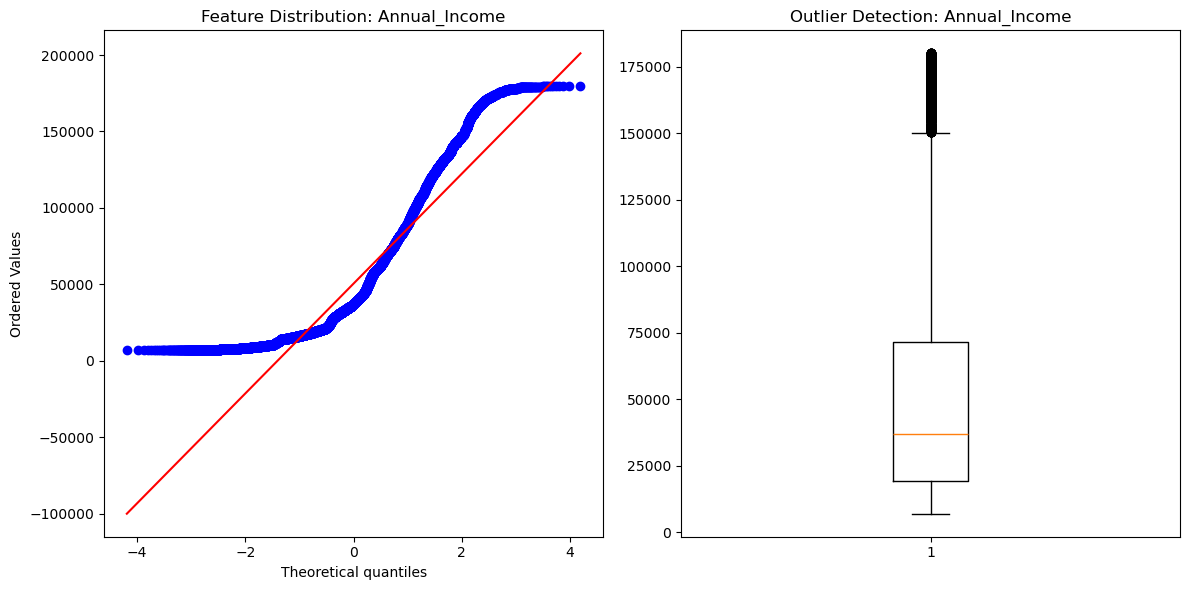

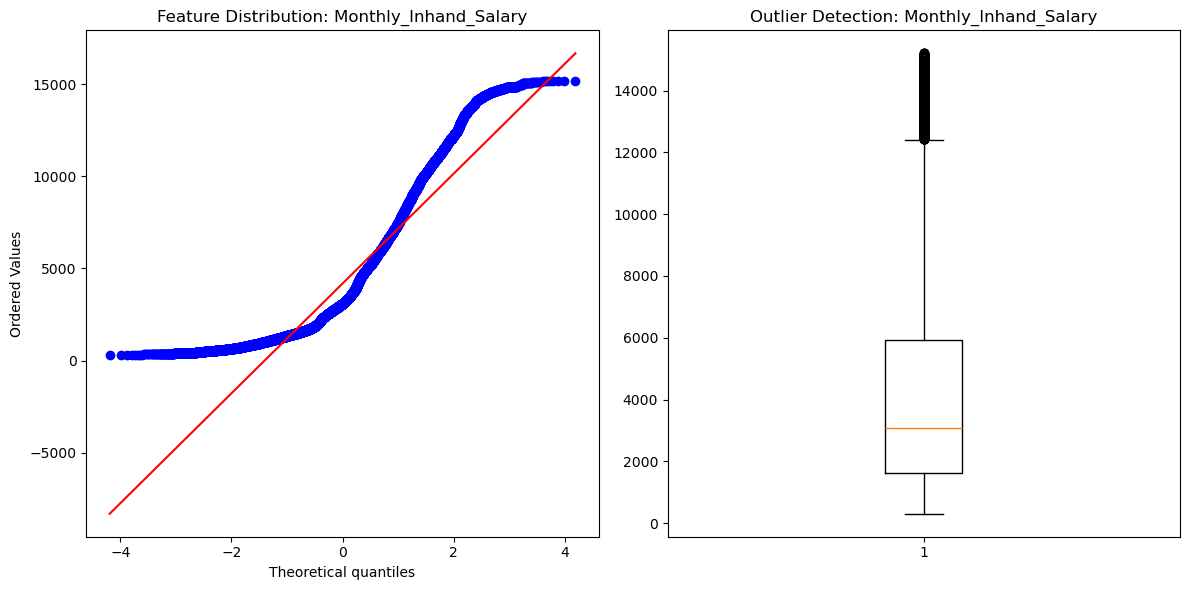

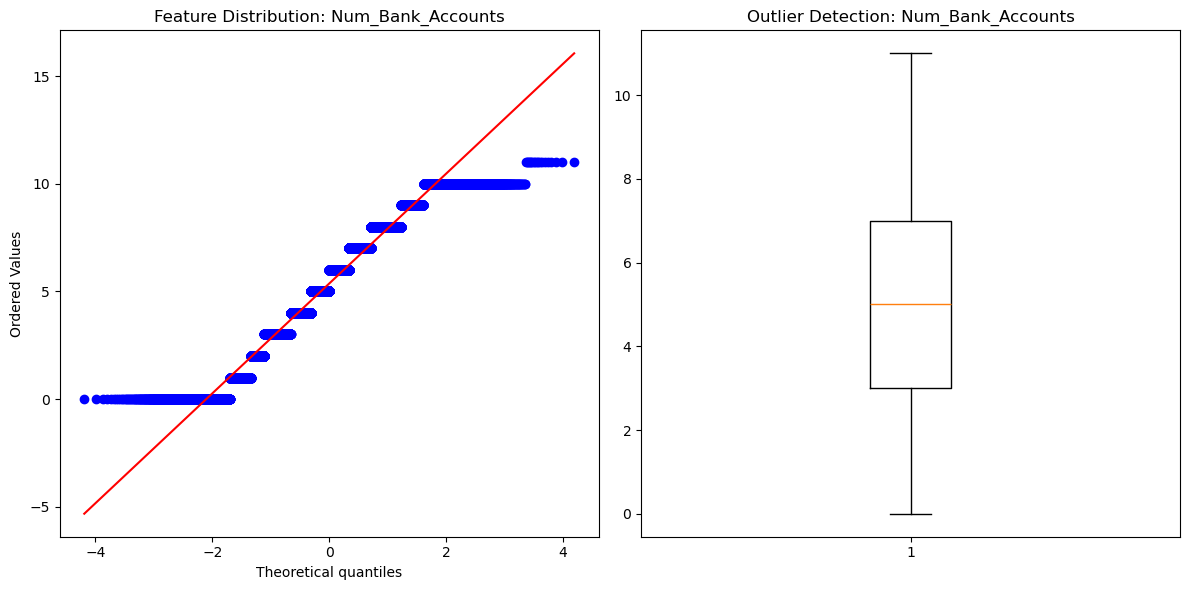

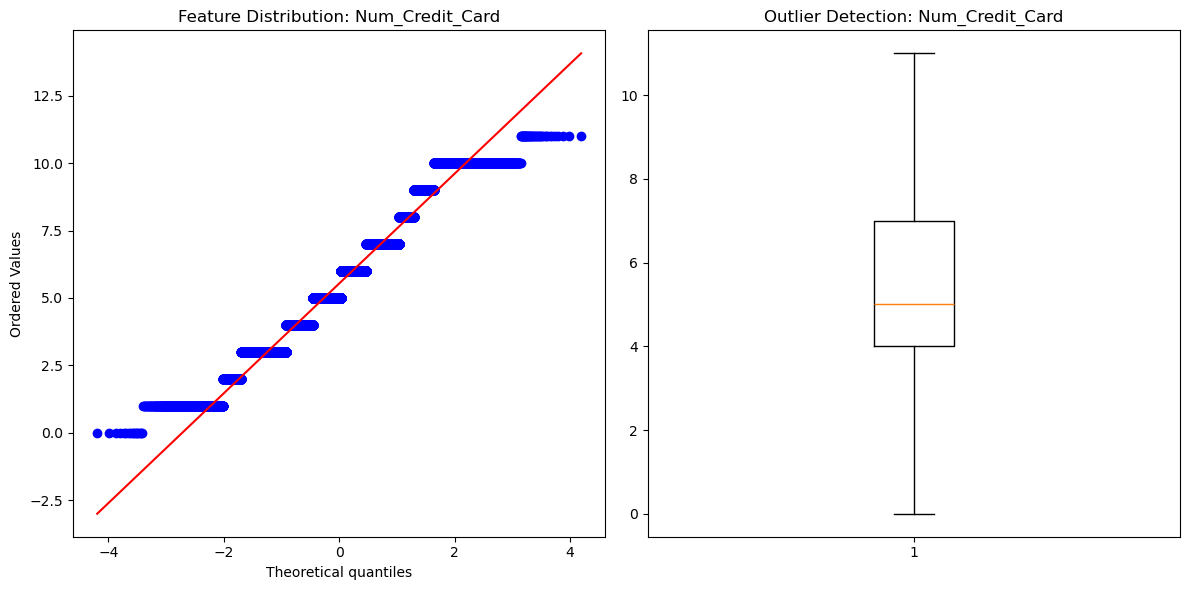

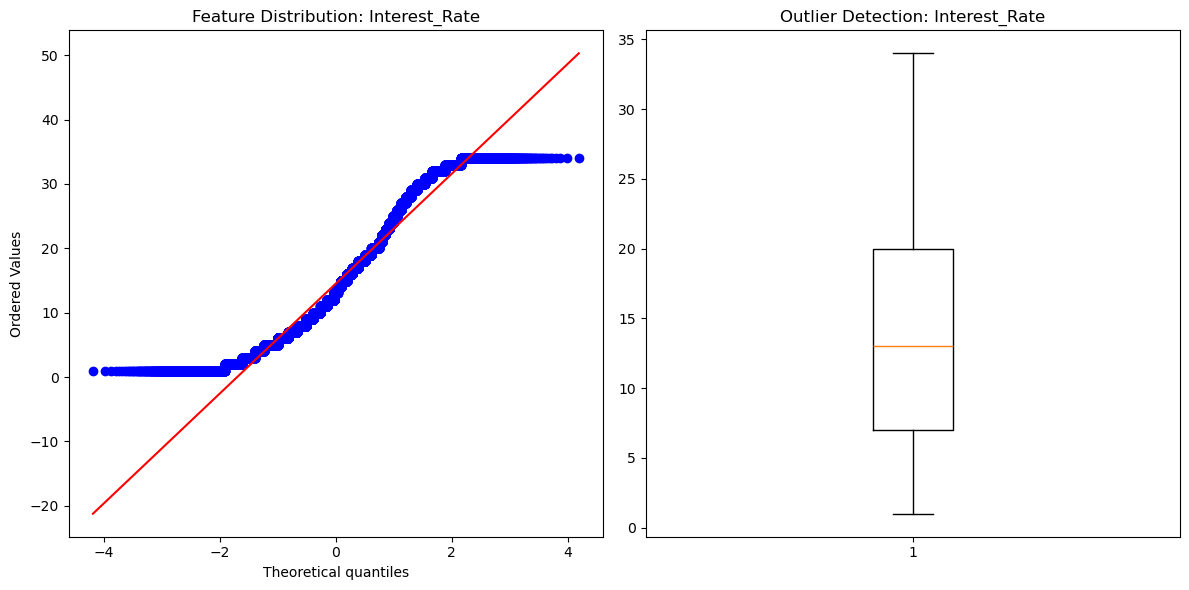

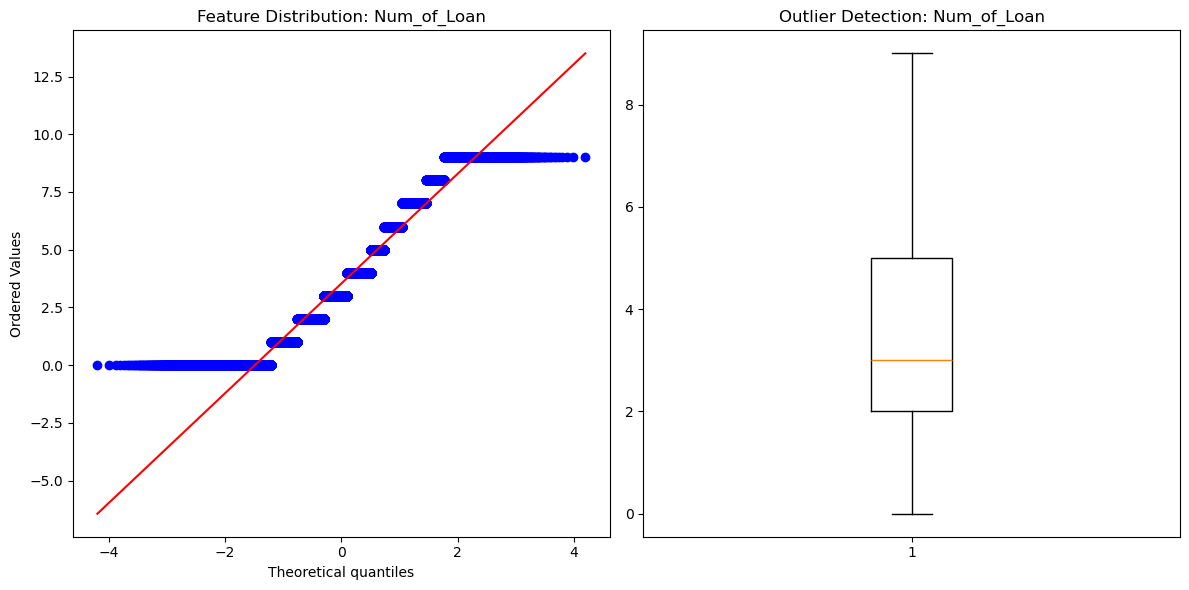

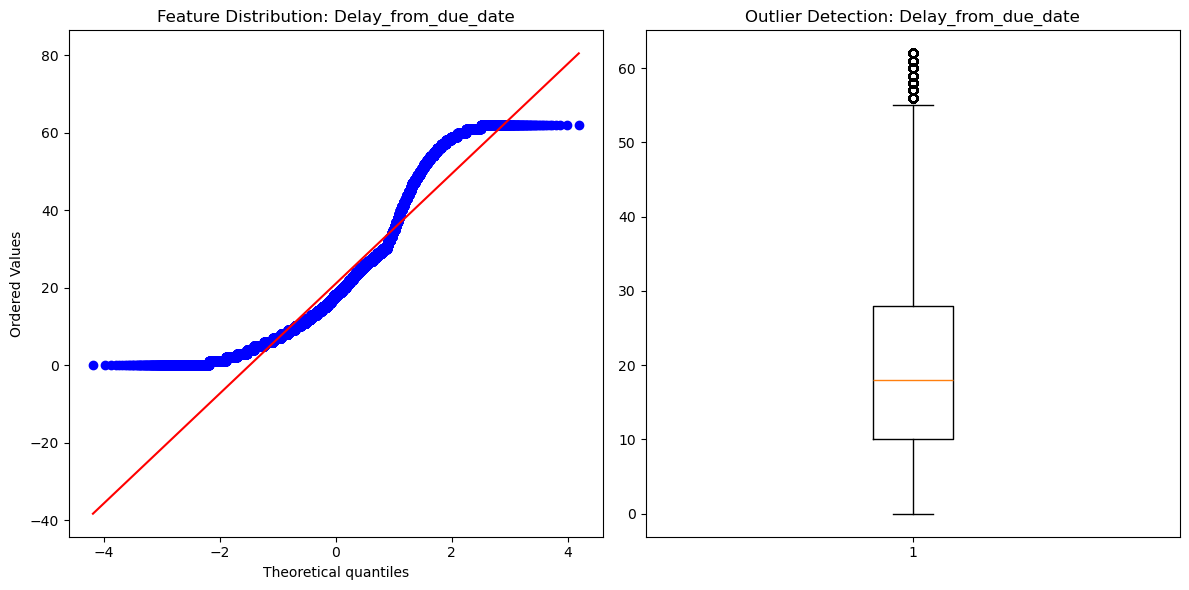

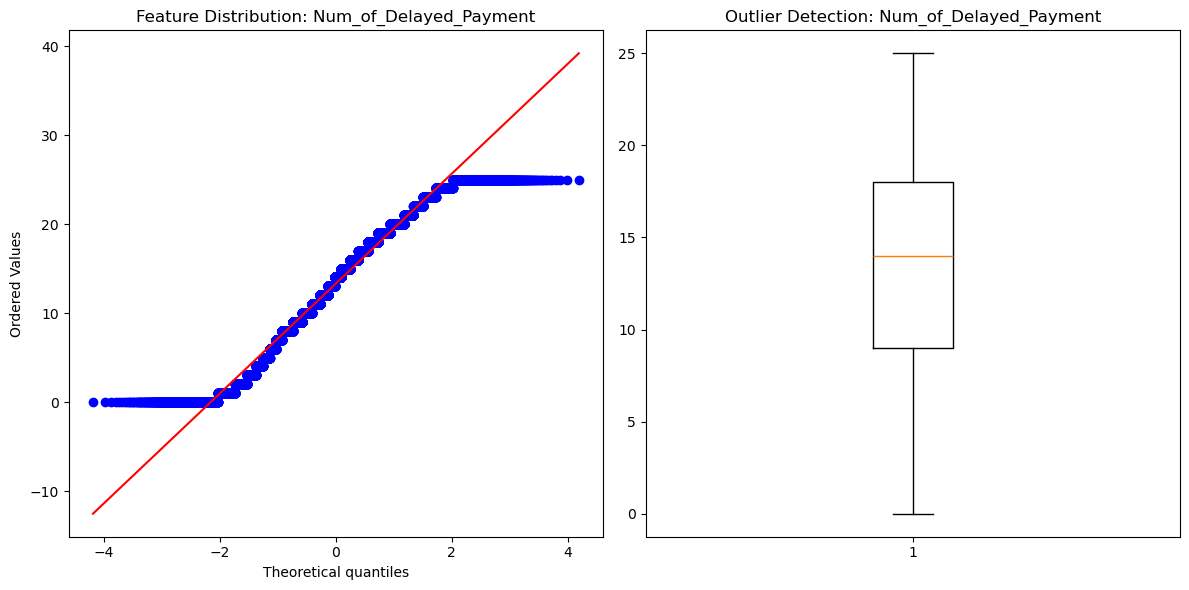

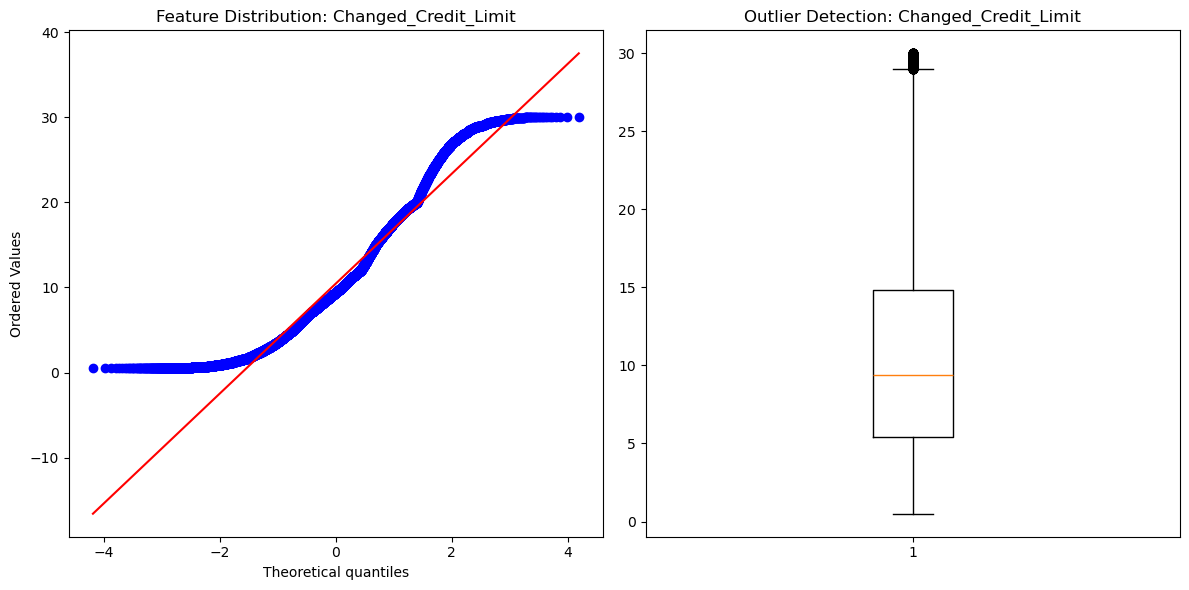

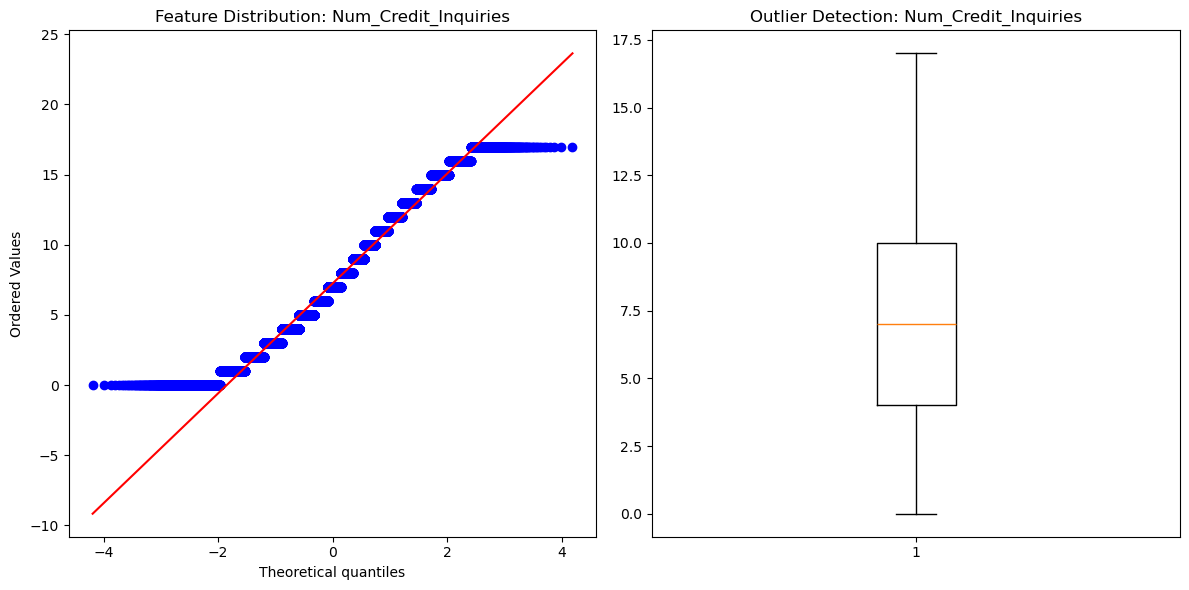

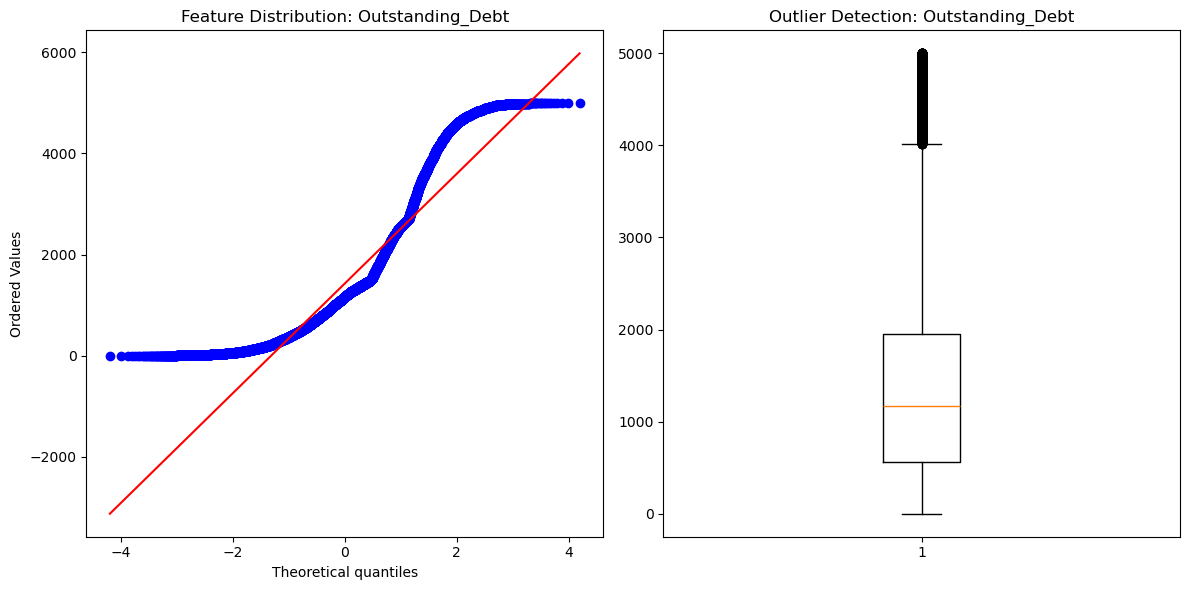

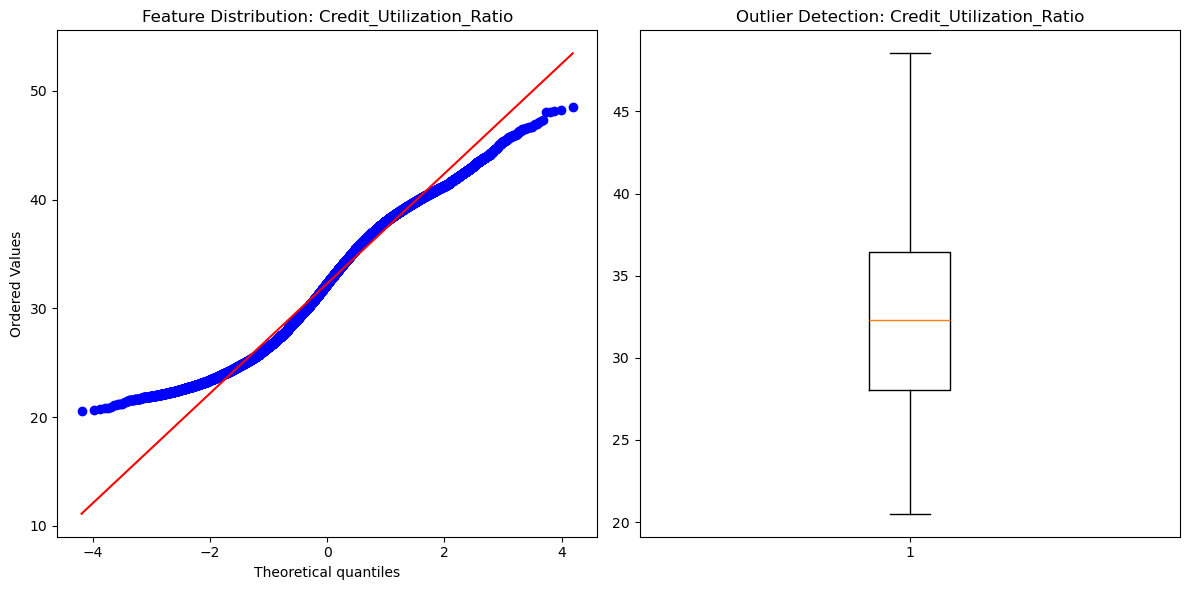

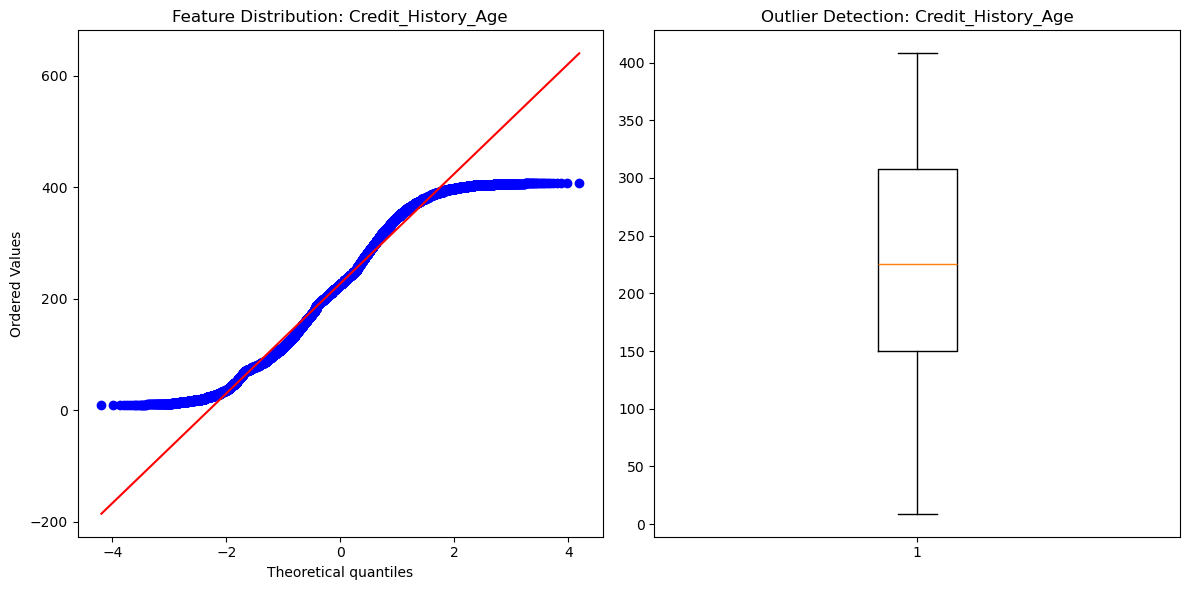

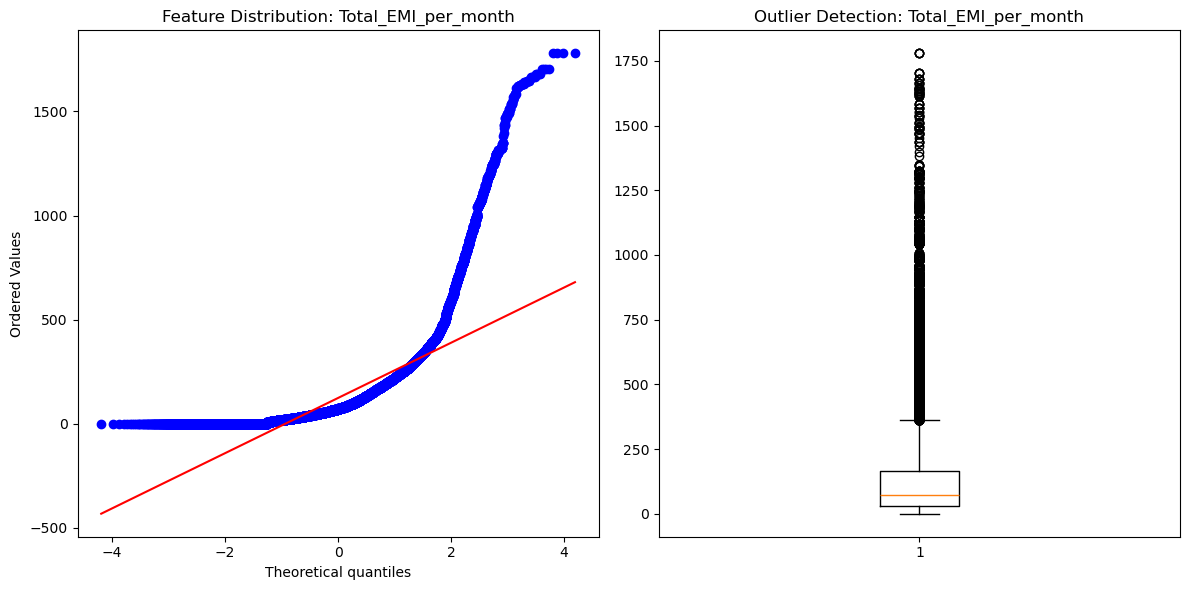

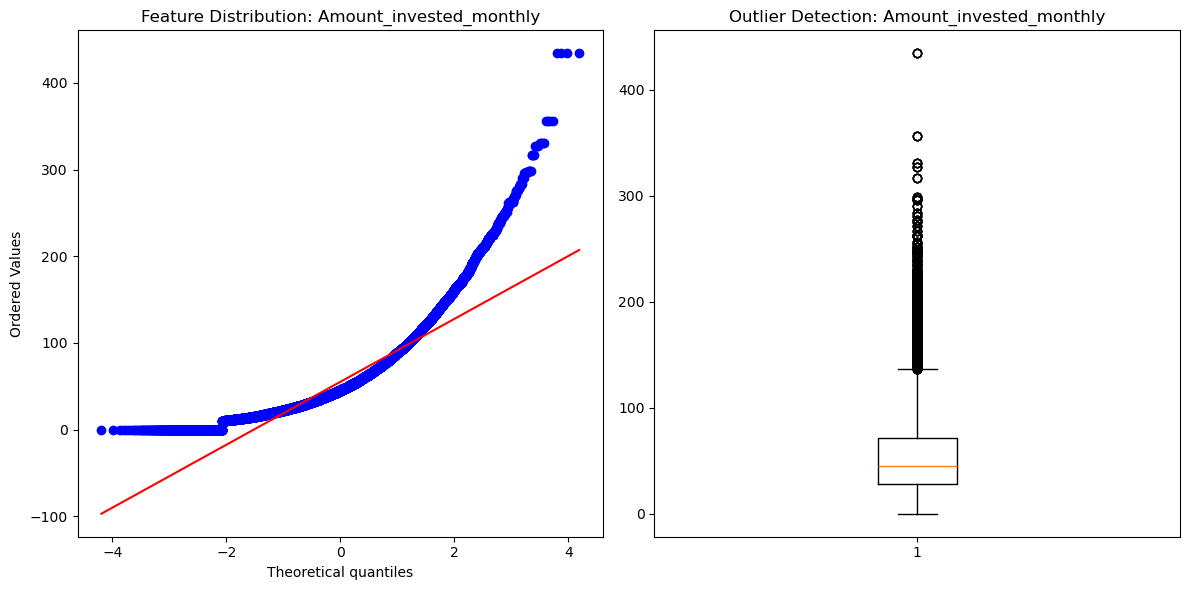

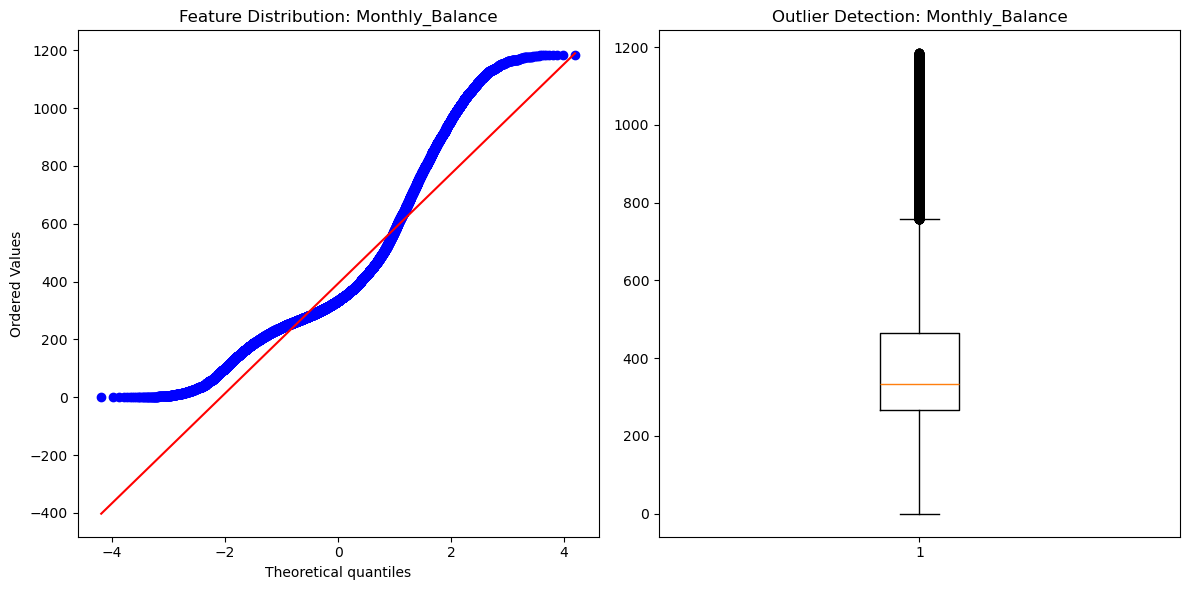

In [10]:
for col in numeric_df_test:
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    probplot(numeric_df_test[col], plot=plt)
    plt.title(f'Feature Distribution: {col}')
    
    plt.subplot(122)
    plt.boxplot(numeric_df_test[col])
    plt.title(f'Outlier Detection: {col}')
    
    plt.tight_layout()
    plt.show()

FEATURE TRANSFORMATION

Conclusions/ Inferences :

In [11]:
final_train_df = train_df.iloc[:,:-1]

y = train_df.iloc[:,-1:]

In [12]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTENC

# Instantiate the needed techniques
random_oversampler = RandomOverSampler(random_state=42)
random_undersampler = RandomUnderSampler(random_state=42)

# Apply Random Oversampling
X_train_resampled_random, y_train_resampled_random = random_oversampler.fit_resample(final_train_df, y)

# Apply Random Undersampling
X_train_resampled_under, y_train_resampled_under = random_undersampler.fit_resample(final_train_df, y)

# # Define which columns are categorical
# categorical_features = [0, 1, 2]  # Replace with the actual indices of your categorical features

# # Apply SMOTE-ENC
# smote_enc = SMOTENC(categorical_features=categorical_features, random_state=42)
# X_resampled_smoteenc, y_resampled_smoteenc = smote_enc.fit_resample(X, y)

c:\Users\Shree123\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shree123\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shree123\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Shree123\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

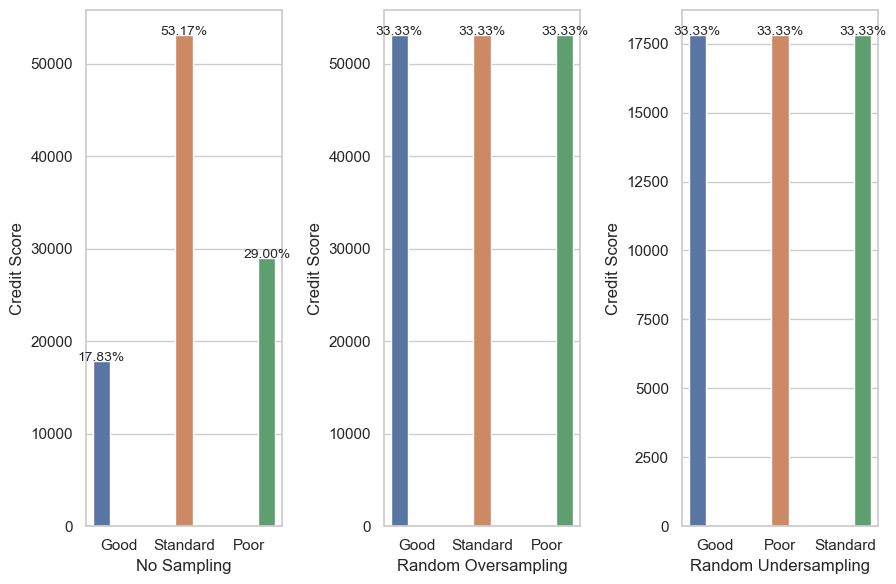

In [13]:
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

# 1
plt.subplot(1, 5, 1)
ax1 = sns.countplot(x='Credit_Score',hue='Credit_Score', data=y)
plt.xlabel('No Sampling')
plt.ylabel('Credit Score')

# Adding percentages to the bars in df_before
total_before = float(len(y))
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2.,
             height + 0.05,
             '{:.2f}%'.format((height / total_before) * 100),
             ha="center", fontsize=10)

# 2
plt.subplot(1, 5, 2)
ax2 = sns.countplot(x='Credit_Score', hue='Credit_Score', data=y_train_resampled_random)
plt.xlabel('Random Oversampling')
plt.ylabel('Credit Score')

# Adding percentages to the bars in df_after
total_after = float(len(y_train_resampled_random))
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2.,
             height + 0.05,
             '{:.2f}%'.format((height / total_after) * 100),
             ha="center", fontsize=10)
# 3
plt.subplot(1, 5, 3)
ax3 = sns.countplot(x='Credit_Score', hue='Credit_Score', data=y_train_resampled_under)
plt.xlabel('Random Undersampling')
plt.ylabel('Credit Score')

# Adding percentages to the bars in df_after
total_after = float(len(y_train_resampled_under))
for p in ax3.patches:
    height = p.get_height()
    ax3.text(p.get_x() + p.get_width() / 2.,
             height + 0.05,
             '{:.2f}%'.format((height / total_after) * 100),
             ha="center", fontsize=10)
ax1.legend_.remove()
ax2.legend_.remove()
ax3.legend_.remove()
# ax4.legend_.remove()
# ax5.legend_.remove()
plt.tight_layout()
plt.show()

In [14]:
# checking the shape after sampling

# a) for random oversampling
print(f" Shape after oversampling:: {X_train_resampled_random.shape , y_train_resampled_random.shape}")


# b) for random undersampling
print(f" Shape after undersampling :: {X_train_resampled_under.shape , y_train_resampled_under.shape}")



 Shape after oversampling:: ((159522, 23), (159522, 1))
 Shape after undersampling :: ((53484, 23), (53484, 1))


### Transformation for Oversampling ###

In [15]:
print(X_train_resampled_random['Type_of_Loan'].unique())
print('-'*40)
print(f"Distinct Loan type count : {X_train_resampled_random['Type_of_Loan'].nunique()}")

print('\n')

print(X_train_resampled_under['Type_of_Loan'].unique())
print('-'*40)
print(f"Distinct Loan type count : {X_train_resampled_under['Type_of_Loan'].nunique()}")

['auto loan,credit-builder loan,personal loan,home equity loan'
 'credit-builder loan' 'auto loan,auto loan,not specified' ...
 'home equity loan,auto loan,auto loan,auto loan'
 'payday loan,student loan,mortgage loan,not specified'
 'personal loan,auto loan,mortgage loan,student loan,student loan']
----------------------------------------
Distinct Loan type count : 6261


['auto loan,credit-builder loan,personal loan,home equity loan'
 'credit-builder loan' 'auto loan,auto loan,not specified' ...
 'not specified,auto loan,debt consolidation loan,payday loan,student loan,not specified,home equity loan'
 'credit-builder loan,debt consolidation loan,student loan,debt consolidation loan'
 'auto loan,credit-builder loan,student loan,payday loan,payday loan']
----------------------------------------
Distinct Loan type count : 6189


In [16]:
#  Splitting payment behaviour into 2 seperate features : Type of Spent and Type of payment
X_train_resampled_random[['Type_of_Spent', 'Payment_type']] = X_train_resampled_random['Payment_Behaviour'].str.split('_', expand=True, n=1)

X_train_resampled_random['Type_of_Payment'] = X_train_resampled_random['Payment_type'].str.extract(r'spent_(\w+)_value_payments')

X_train_resampled_random.drop(columns = ['Payment_type' , 'Payment_Behaviour'] , inplace = True)

In [17]:
def extract_loan_type(row, loan_type):
    types = row['Type_of_Loan'].split(",")
    return loan_type in types

X_train_resampled_random['payday_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'payday loan'), axis=1).astype(int)
X_train_resampled_random['mortgage_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'mortgage loan'), axis=1).astype(int)
X_train_resampled_random['credit_builder_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'credit-builder'), axis=1).astype(int)
X_train_resampled_random['auto_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'auto loan'), axis=1).astype(int)
X_train_resampled_random['student_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'student loan'), axis=1).astype(int)
X_train_resampled_random['debt_consolidation_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'debt consolidation loan'), axis=1).astype(int)
X_train_resampled_random['not_specified'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'not specified'), axis=1).astype(int)
X_train_resampled_random['personal_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'personal loan'), axis=1).astype(int)   
X_train_resampled_random['home_equity_loan'] = X_train_resampled_random.apply(lambda row: extract_loan_type(row, 'home equity loan'), axis=1).astype(int)

###  Transformation for Undersampling  ###

In [18]:
#  Splitting payment behaviour into 2 seperate features : Type of Spent and Type of payment
X_train_resampled_under[['Type_of_Spent', 'Payment_type']] = X_train_resampled_under['Payment_Behaviour'].str.split('_', expand=True, n=1)

X_train_resampled_under['Type_of_Payment'] = X_train_resampled_under['Payment_type'].str.extract(r'spent_(\w+)_value_payments')

X_train_resampled_under.drop(columns = ['Payment_type' , 'Payment_Behaviour'] , inplace = True)

In [19]:
def extract_loan_type(row, loan_type):
    types = row['Type_of_Loan'].split(",")
    return loan_type in types

X_train_resampled_under['payday_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'payday loan'), axis=1).astype(int)
X_train_resampled_under['mortgage_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'mortgage loan'), axis=1).astype(int)
X_train_resampled_under['credit_builder_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'credit-builder'), axis=1).astype(int)
X_train_resampled_under['auto_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'auto loan'), axis=1).astype(int)
X_train_resampled_under['student_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'student loan'), axis=1).astype(int)
X_train_resampled_under['debt_consolidation_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'debt consolidation loan'), axis=1).astype(int)
X_train_resampled_under['not_specified'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'not specified'), axis=1).astype(int)
X_train_resampled_under['personal_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'personal loan'), axis=1).astype(int)   
X_train_resampled_under['home_equity_loan'] = X_train_resampled_under.apply(lambda row: extract_loan_type(row, 'home equity loan'), axis=1).astype(int)

### Transformation for Test ###

In [20]:
test_df[['Type_of_Spent', 'Payment_type']] = test_df['Payment_Behaviour'].str.split('_', expand=True, n=1)

test_df['Type_of_Payment'] = test_df['Payment_type'].str.extract(r'spent_(\w+)_value_payments')

test_df.drop(columns = ['Payment_type' , 'Payment_Behaviour'] , inplace = True)

In [21]:
def extract_loan_type(row, loan_type):
    types = row['Type_of_Loan'].split(",")
    return loan_type in types

test_df['payday_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'payday loan'), axis=1).astype(int)
test_df['mortgage_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'mortgage loan'), axis=1).astype(int)
test_df['credit_builder_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'credit-builder'), axis=1).astype(int)
test_df['auto_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'auto loan'), axis=1).astype(int)
test_df['student_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'student loan'), axis=1).astype(int)
test_df['debt_consolidation_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'debt consolidation loan'), axis=1).astype(int)
test_df['not_specified'] = test_df.apply(lambda row: extract_loan_type(row, 'not specified'), axis=1).astype(int)
test_df['personal_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'personal loan'), axis=1).astype(int)   
test_df['home_equity_loan'] = test_df.apply(lambda row: extract_loan_type(row, 'home equity loan'), axis=1).astype(int)


In [22]:
# Dropping the transformed column
X_train_resampled_random.drop(columns =['Type_of_Loan'] , inplace = True)

X_train_resampled_under.drop(columns =['Type_of_Loan'] , inplace = True)

test_df.drop(columns =['Type_of_Loan'] , inplace = True)

In [23]:
train_df['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [24]:
train_df.select_dtypes('O')

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Small_value_payments,Good
1,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Large_value_payments,Good
2,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Medium_value_payments,Good
3,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,Low_spent_Small_value_payments,Good
4,Scientist,"auto loan,credit-builder loan,personal loan,ho...",Good,No,High_spent_Medium_value_payments,Good
...,...,...,...,...,...,...
99995,Mechanic,"auto loan,student loan",Good,No,High_spent_Large_value_payments,Poor
99996,Mechanic,"auto loan,student loan",Good,No,High_spent_Medium_value_payments,Poor
99997,Mechanic,"auto loan,student loan",Good,No,High_spent_Large_value_payments,Poor
99998,Mechanic,"auto loan,student loan",Good,No,Low_spent_Large_value_payments,Standard


In [25]:
test_df.select_dtypes('O')

,Occupation,Credit_Mix,Payment_of_Min_Amount,Type_of_Spent,Type_of_Payment
0,Scientist,Good,No,Low,Small
1,Scientist,Good,No,High,Medium
2,Scientist,Good,No,Low,Medium
3,Scientist,Good,No,High,Medium
4,Teacher,Good,No,High,Large
...,...,...,...,...,...
49995,Architect,Bad,Yes,Low,Small
49996,Mechanic,Good,NM,Low,Small
49997,Mechanic,Good,No,Low,Large
49998,Mechanic,Good,No,High,Small


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [27]:
standard_scaler_transformer = ('Standard_Scaler',
                        Pipeline([('trf1' , StandardScaler())]) , [ 'Month','Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance',  'payday_loan', 'mortgage_loan',
       'credit_builder_loan', 'auto_loan', 'student_loan',
       'debt_consolidation_loan', 'not_specified', 'personal_loan',
       'home_equity_loan' ])
ordinal_transformer = ('Ordinal', 
                       Pipeline([('trf2', OrdinalEncoder(categories=[['Bad', 'Standard', 'Good'], ['Low', 'High'], ['Small', 'Medium', 'Large']]))]), ['Credit_Mix', 'Type_of_Spent', 'Type_of_Payment'])
one_hot_transformer = ('One-Hot', 
                       Pipeline([('trf3', OneHotEncoder())]), ['Occupation', 'Payment_of_Min_Amount'])


transformer_X_oversample = ColumnTransformer(transformers=
                                  [ standard_scaler_transformer ,ordinal_transformer, one_hot_transformer]
                , remainder='passthrough')
transformer_X_oversample

X_oversample_df_transformed = transformer_X_oversample.fit_transform(X_train_resampled_random)

transformed_feature_names_oversample = []

standard_scaler_names = transformer_X_oversample.named_transformers_['Standard_Scaler'].named_steps['trf1'].get_feature_names_out(standard_scaler_transformer[2])
transformed_feature_names_oversample.extend(standard_scaler_names)

ordinal_feature_names = transformer_X_oversample.named_transformers_['Ordinal'].named_steps['trf2'].get_feature_names_out(ordinal_transformer[2])
transformed_feature_names_oversample.extend(ordinal_feature_names)

one_hot_feature_names = transformer_X_oversample.named_transformers_['One-Hot'].named_steps['trf3'].get_feature_names_out(one_hot_transformer[2])
transformed_feature_names_oversample.extend(one_hot_feature_names)


X_oversample_df = pd.DataFrame( X_oversample_df_transformed, columns= transformed_feature_names_oversample)

X_oversample_df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-1.548499,-0.98373,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.140887,-0.869720,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.110976,-0.98373,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.140887,-1.331564,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.673452,-0.98373,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.140887,-0.869720,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.235928,-0.98373,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.008009,-1.331564,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.201595,-0.98373,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-0.941570,-1.331564,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [28]:
standard_scaler_transformer = ('Standard_Scaler',
                        Pipeline([('trf1' , StandardScaler())]) , [ 'Month','Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance',  'payday_loan', 'mortgage_loan',
       'credit_builder_loan', 'auto_loan', 'student_loan',
       'debt_consolidation_loan', 'not_specified', 'personal_loan',
       'home_equity_loan' ])
ordinal_transformer = ('Ordinal', 
                       Pipeline([('trf2', OrdinalEncoder(categories=[['Bad', 'Standard', 'Good'], ['Low', 'High'], ['Small', 'Medium', 'Large']]))]), ['Credit_Mix', 'Type_of_Spent', 'Type_of_Payment'])
one_hot_transformer = ('One-Hot', 
                       Pipeline([('trf3', OneHotEncoder())]), ['Occupation', 'Payment_of_Min_Amount'])


transformer_X_undersample = ColumnTransformer(transformers=
                                  [ standard_scaler_transformer ,ordinal_transformer, one_hot_transformer]
                , remainder='passthrough')
transformer_X_undersample

X_undersample_df_transformed = transformer_X_undersample.fit_transform(X_train_resampled_under)

transformed_feature_names_undersample = []

standard_scaler_names = transformer_X_undersample.named_transformers_['Standard_Scaler'].named_steps['trf1'].get_feature_names_out(standard_scaler_transformer[2])
transformed_feature_names_undersample.extend(standard_scaler_names)

ordinal_feature_names = transformer_X_undersample.named_transformers_['Ordinal'].named_steps['trf2'].get_feature_names_out(ordinal_transformer[2])
transformed_feature_names_undersample.extend(ordinal_feature_names)

one_hot_feature_names = transformer_X_undersample.named_transformers_['One-Hot'].named_steps['trf3'].get_feature_names_out(one_hot_transformer[2])
transformed_feature_names_undersample.extend(one_hot_feature_names)


X_undersample_df = pd.DataFrame( X_undersample_df_transformed, columns= transformed_feature_names_undersample)

X_undersample_df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-1.548188,-0.980474,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.142898,-0.868205,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-1.110853,-0.980474,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.142898,-1.328944,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.673518,-0.980474,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.142898,-0.868205,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.236183,-0.980474,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.009667,-1.328944,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.201153,-0.980474,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-0.943051,-1.328944,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [29]:
standard_scaler_transformer = ('Standard_Scaler',
                        Pipeline([('trf1' , StandardScaler())]) , [ 'Month','Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance',  'payday_loan', 'mortgage_loan',
       'credit_builder_loan', 'auto_loan', 'student_loan',
       'debt_consolidation_loan', 'not_specified', 'personal_loan',
       'home_equity_loan' ])
ordinal_transformer = ('Ordinal', 
                       Pipeline([('trf2', OrdinalEncoder(categories=[['Bad', 'Standard', 'Good'], ['Low', 'High'], ['Small', 'Medium', 'Large']]))]), ['Credit_Mix', 'Type_of_Spent', 'Type_of_Payment'])
one_hot_transformer = ('One-Hot', 
                       Pipeline([('trf3', OneHotEncoder())]), ['Occupation', 'Payment_of_Min_Amount'])


transformer_X_test = ColumnTransformer(transformers=
                                  [ standard_scaler_transformer ,ordinal_transformer, one_hot_transformer]
                , remainder='passthrough')
transformer_X_test

X_test_df_transformed = transformer_X_test.fit_transform(test_df)

transformed_feature_names_test = []

standard_scaler_names = transformer_X_test.named_transformers_['Standard_Scaler'].named_steps['trf1'].get_feature_names_out(standard_scaler_transformer[2])
transformed_feature_names_test.extend(standard_scaler_names)

ordinal_feature_names = transformer_X_test.named_transformers_['Ordinal'].named_steps['trf2'].get_feature_names_out(ordinal_transformer[2])
transformed_feature_names_test.extend(ordinal_feature_names)

one_hot_feature_names = transformer_X_test.named_transformers_['One-Hot'].named_steps['trf3'].get_feature_names_out(one_hot_transformer[2])
transformed_feature_names_test.extend(one_hot_feature_names)


X_test_df = pd.DataFrame( X_test_df_transformed, columns= transformed_feature_names_test)

X_test_df.head()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-1.341641,-1.003718,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.220325,-1.012314,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.447214,-0.910820,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.220325,-0.691708,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.447214,-0.910820,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.220325,-1.493224,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.341641,-0.910820,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.152782,-1.332921,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,-1.341641,-0.539228,-0.408815,-0.360612,-1.298421,-0.740337,-0.976067,-1.035374,-1.220325,-1.974133,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Transformations Done  ###

In [30]:
# Trial Run
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# hyperopt
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from hyperopt.pyll.base import scope
from sklearn.feature_selection import mutual_info_classif, SelectKBest , f_classif
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [31]:
le = LabelEncoder()

y_encoded_over = le.fit_transform(y_train_resampled_random)

In [32]:
y_encoded_under = le.fit_transform(y_train_resampled_under)

### FEATURE SELECTION - INTEGRATED RECURSIVE FEATURE ELIMINATION WITH INFORMATION GAIN

In [33]:
# Feature selection on the oversampled subset

feature_names= [i for i in X_oversample_df.columns]

mi_scores = mutual_info_classif(X_oversample_df, y_encoded_over)
f_scores, _ = f_classif(X_oversample_df, y_encoded_over)

# Combine scores using a simple average (you can adjust this method as needed)
combined_scores = (mi_scores + f_scores) / 2

# Select top k features based on combined scores
k = 15  # Number of features to select
selector = SelectKBest(score_func=lambda X, y: combined_scores, k=k)
X_selected = selector.fit_transform(X_oversample_df, y_encoded_over)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# ?
selected_features = [feature_names[i] for i in selected_features_indices]

print(f'selected features in the oversampled subset ::  {selected_features}')

final_oversampled_df = X_oversample_df[selected_features]
final_oversample_test_df = X_test_df[selected_features]

selected features in the oversampled subset ::  ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age', 'Credit_Mix', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes']


In [34]:
final_oversampled_df.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Credit_Mix,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.140887,-0.869720,0.218338,-0.411834,-0.514138,0.378931,2.0,1.0,0.0
1,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.140887,-1.331564,0.218338,-0.411834,-0.514138,0.389018,2.0,1.0,0.0
2,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.140887,-0.869720,0.218338,-0.411834,-0.514138,0.399105,2.0,1.0,0.0
3,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-1.008009,-1.331564,-0.555164,-0.411834,-0.514138,0.409192,2.0,1.0,0.0
4,-0.834503,-0.761578,-0.788685,-0.653562,-1.215101,0.236027,-0.941570,-1.331564,0.218338,-0.411834,-0.514138,0.419280,2.0,1.0,0.0


In [35]:
final_oversample_test_df.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Credit_Mix,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.220325,-1.012314,0.121826,-0.818071,-0.533485,0.459766,2.0,1.0,0.0
1,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.220325,-0.691708,0.424591,-0.818071,-0.533485,0.469800,2.0,1.0,0.0
2,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.220325,-1.493224,0.273208,-0.818071,-0.533485,0.479834,2.0,1.0,0.0
3,-0.819625,-0.742670,-0.913044,-0.740337,-1.319266,0.190946,-1.152782,-1.332921,0.121826,-0.818071,-0.533485,0.489868,2.0,1.0,0.0
4,-0.408815,-0.360612,-1.298421,-0.740337,-0.976067,-1.035374,-1.220325,-1.974133,-0.763761,-0.565605,-0.710911,1.001598,2.0,1.0,0.0


In [38]:
# Feature selection on the undersample subset

feature_names= [i for i in X_undersample_df.columns]

mi_scores = mutual_info_classif(X_undersample_df, y_encoded_under)
f_scores, _ = f_classif(X_undersample_df, y_encoded_under)

# Combine scores using a simple average (you can adjust this method as needed)
combined_scores = (mi_scores + f_scores) / 2

# Select top k features based on combined scores
k = 15  # Number of features to select
selector = SelectKBest(score_func=lambda X, y: combined_scores, k=k)
X_selected = selector.fit_transform(X_undersample_df, y_encoded_under)

# Get indices of selected features
selected_features_indices = selector.get_support(indices=True)

# ?
selected_features = [feature_names[i] for i in selected_features_indices]

print(f'selected features in the oversampled subset ::  {selected_features}')

final_undersampled_df = X_undersample_df[selected_features]
final_undersampled_test_df = X_test_df[selected_features]

selected features in the oversampled subset ::  ['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_History_Age', 'Credit_Mix', 'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes']


In [39]:
final_undersampled_df.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Credit_Mix,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
0,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.142898,-0.868205,0.220129,-0.411199,-0.511938,0.375026,2.0,1.0,0.0
1,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.142898,-1.328944,0.220129,-0.411199,-0.511938,0.385115,2.0,1.0,0.0
2,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.142898,-0.868205,0.220129,-0.411199,-0.511938,0.395203,2.0,1.0,0.0
3,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-1.009667,-1.328944,-0.554362,-0.411199,-0.511938,0.405292,2.0,1.0,0.0
4,-0.829671,-0.756888,-0.787894,-0.648846,-1.215496,0.238909,-0.943051,-1.328944,0.220129,-0.411199,-0.511938,0.415380,2.0,1.0,0.0


MODEL BUILDING

In [44]:
def evaluate_and_stack(X, y):
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define Models
    models = [
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3)),
        ('etc', ExtraTreesClassifier()),
        ('rf', RandomForestClassifier()),
        ('knn', KNeighborsClassifier()),
        ('dtc', DecisionTreeClassifier()),
        ('adb', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), algorithm='SAMME.R')),
        ('mlp', MLPClassifier(max_iter=1000))
    ]
    
    # Evaluate Models
    results = {}
    classification_reports = {}
    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        report = classification_report(y_val, y_pred, output_dict=True)

        classification_reports[name] = report
        accuracy = report['accuracy']
        results[name] = accuracy
        print(f"{name}: {accuracy}")
        print(f'{name} : {report}')

    # Rank models based on performance
    sorted_results = sorted(results.items(), key=lambda item: item[1], reverse=True)
    top_models = sorted_results[:4]

    # Stacking Ensemble
    estimators = [(name, dict(models)[name]) for name, _ in top_models[1:]]
    main_classifier = dict(models)[top_models[0][0]]
    stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=main_classifier)
    
    # Fit the stacking classifier on the whole training dataset
    stacking_classifier.fit(X_train, y_train)
    
    # Predict on the test set
    y_val_pred = stacking_classifier.predict(X_val)
    stacking_classification_report = classification_report(y_val, y_val_pred, output_dict=True)

    print("Stacking Ensemble Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print("-" * 50)

    # # Save models
    # for name, model in models:
    #     joblib.dump(model, f"{name}_model.joblib")
    # joblib.dump(stacking_classifier, "stacking_classifier.joblib")
    
    return stacking_classifier

In [45]:
stacking_classifier_oversample = evaluate_and_stack(final_oversampled_df, y_encoded_over)

xgb: 0.8017865538316878
xgb : {'0': {'precision': 0.7962932042077141, 'recall': 0.8905695611577964, 'f1-score': 0.8407968970380817, 'support': 10710.0}, '1': {'precision': 0.8277834148141315, 'recall': 0.8483645301569295, 'f1-score': 0.8379476166020823, 'support': 10578.0}, '2': {'precision': 0.7780101254677526, 'recall': 0.6658189695770933, 'f1-score': 0.7175557021773334, 'support': 10617.0}, 'accuracy': 0.8017865538316878, 'macro avg': {'precision': 0.8006955814965327, 'recall': 0.8015843536306063, 'f1-score': 0.7987667386058325, 'support': 31905.0}, 'weighted avg': {'precision': 0.8006496373941274, 'recall': 0.8017865538316878, 'f1-score': 0.7988413585867867, 'support': 31905.0}}
etc: 0.9096379877762106
etc : {'0': {'precision': 0.9235696735696736, 'recall': 0.9827264239028944, 'f1-score': 0.9522301637564462, 'support': 10710.0}, '1': {'precision': 0.8875886524822695, 'recall': 0.9464927207411609, 'f1-score': 0.9160947936682222, 'support': 10578.0}, '2': {'precision': 0.919384548705

In [46]:
stacking_classifier_under = evaluate_and_stack(final_undersampled_df, y_encoded_under)

xgb: 0.7804057212302514
xgb : {'0': {'precision': 0.7782839787395596, 'recall': 0.8575013943112103, 'f1-score': 0.8159745256733448, 'support': 3586.0}, '1': {'precision': 0.8202752035944959, 'recall': 0.8195847362514029, 'f1-score': 0.8199298245614035, 'support': 3564.0}, '2': {'precision': 0.7384615384615385, 'recall': 0.6630955737242741, 'f1-score': 0.698752228163993, 'support': 3547.0}, 'accuracy': 0.7804057212302514, 'macro avg': {'precision': 0.7790069069318646, 'recall': 0.7800605680956291, 'f1-score': 0.778218859466247, 'support': 10697.0}, 'weighted avg': {'precision': 0.7790698560618792, 'recall': 0.7804057212302514, 'f1-score': 0.7784228005140823, 'support': 10697.0}}
etc: 0.8115359446573805
etc : {'0': {'precision': 0.8464209401709402, 'recall': 0.8837144450641383, 'f1-score': 0.8646657571623465, 'support': 3586.0}, '1': {'precision': 0.8482392397987703, 'recall': 0.8515712682379349, 'f1-score': 0.8499019882385886, 'support': 3564.0}, '2': {'precision': 0.7339259259259259, '

In [47]:
stacking_classifier_oversample 

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('dtc', DecisionTreeClassifier()),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=ExtraTreesClassifier())

In [48]:
stacking_classifier_under

StackingClassifier(estimators=[('etc', ExtraTreesClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              i...
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_class=3,
                                              num_parallel_tree=None,
                                              objective='multi:softmax', ...)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=RandomForestClassifier())

In [68]:
search_spaces = {
    'xgb': {
        'xgb__learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
        'xgb__max_depth': hp.quniform('max_depth', 3, 15, 1),
        'xgb__min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'xgb__subsample': hp.uniform('subsample', 0.6, 1.0),
        'xgb__n_estimators': hp.choice('n_estimators', [100, 200, 300, 400, 500])
    },
    'etc': {
        'etc__n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250, 300]),
        'etc__max_depth': hp.quniform('max_depth', 5, 30, 1),
        'etc__min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
        'etc__min_samples_leaf': hp.uniform('min_samples_leaf', 0.1, 0.5)
    },
    'rf': {
        'rf__n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250, 300]),
        'rf__max_depth': hp.quniform('max_depth', 5, 30, 1),
        'rf__min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
        'rf__min_samples_leaf': hp.uniform('min_samples_leaf', 0.1, 0.5)
    },
    'knn': {
        'knn__n_neighbors': hp.choice('n_neighbors', range(1, 21)),
        'knn__weights': hp.choice('weights', ['uniform', 'distance']),
        'knn__p': hp.choice('p', [1, 2])
    },
    'dtc': {
        'dtc__max_depth': hp.quniform('max_depth', 1, 30, 1),
        'dtc__min_samples_split': hp.uniform('min_samples_split', 0.1, 1.0),
        'dtc__min_samples_leaf': hp.uniform('min_samples_leaf', 0.1, 0.5)
    },
    'adb': {
        'adb__n_estimators': hp.choice('n_estimators', [50, 100, 150, 200, 250, 300]),
        'adb__learning_rate': hp.uniform('learning_rate', 0.01, 1.0)
    },
    'mlp': {
        'mlp__hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(50,), (100,), (150,), (200,)]),
    }
}

# Define models
models = {
    'xgb': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=3),
    'etc': ExtraTreesClassifier(),
    'rf': RandomForestClassifier(),
    'knn': KNeighborsClassifier(),
    'dtc': DecisionTreeClassifier(),
    'adb': AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), algorithm='SAMME.R'),
    'mlp': MLPClassifier(max_iter=1000)
}

# Construct pipelines for each model
pipelines = {name: Pipeline([(name, model)]) for name, model in models.items()}

# Hyperopt function for hyperparameter optimization
def hyperopt_function(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    def objective_function(params, model_name):
        pipeline = pipelines[model_name]
        # Cast hyperparameters to int where necessary
        if 'xgb__max_depth' in params:
            params['xgb__max_depth'] = int(params['xgb__max_depth'])
        if 'xgb__min_child_weight' in params:
            params['xgb__min_child_weight'] = int(params['xgb__min_child_weight'])
        if 'etc__max_depth' in params:
            params['etc__max_depth'] = int(params['etc__max_depth'])
        if 'rf__max_depth' in params:
            params['rf__max_depth'] = int(params['rf__max_depth'])
        if 'dtc__max_depth' in params:
            params['dtc__max_depth'] = int(params['dtc__max_depth'])

        pipeline.set_params(**params)
        score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
        return {'loss': -score, 'status': STATUS_OK}

    best_params = {}
    for name in models.keys():
        if search_spaces.get(name):
            trials = Trials()
            best = fmin(fn=lambda params: objective_function(params, name),
                        space=search_spaces[name],
                        algo=tpe.suggest,
                        max_evals=50,
                        trials=trials)
            best_params[name] = best
            print(f"Best hyperparameters for {name}: {best}")


HyperOpt for Oversampled Subset

In [69]:
hyperopt_function(final_oversampled_df, y_encoded_over)

  2%|▏         | 1/50 [01:45<1:26:29, 105.92s/trial, best loss: -0.8750638069224914]


KeyboardInterrupt: 

HyperOpt for Undersampling

In [ ]:
hyperopt_function(final_undersampled_df, y_encoded_under)

# ANOVA F-value test for feature selection
## Considerations

*   It only considers the relationship between individual features and the target variable. It doesn't account for potential relationships between features themselves (multicollinearity).
*   Choosing the best features might require looking at both F-scores and p-values. Higher scores and lower p-values (closer to zero) indicate stronger feature importance.

*   You can use the F-scores to rank features by their importance and select the top N features for your model.

In [ ]:
from sklearn.feature_selection import f_classif


# Feature selection with f_classif
f_selector = f_classif(final_train_df, y)  # Pass features (X) and target (y)
f_scores, f_pvalues = f_selector  # Obtain scores and p-values

# Example: Select top 10 features based on scores (consider p-values too)
top_10_features = final_train_df.columns[f_scores.argsort()[-10:]]
X_selected_fclass= final_train_df[top_10_features]  # Select features based on score rankings



In [ ]:
X_selected_fclass

# VIF (Variance Inflation Factor)


*   VIF calculates a score for each feature in your dataset. This score indicates how much the variance of a feature's estimated coefficient is inflated due to its correlation with other features.
*   Higher VIF values suggest a greater degree of multicollinearity.

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame with features

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = final_train_df.columns
vif_data['VIF'] = [variance_inflation_factor(final_train_df.values, i) for i in range(final_train_df.shape[1])]

# Now vif_data contains the VIF values for each feature

In [ ]:
vif_data

To select features based on VIF values, you typically want to exclude features with high VIF, as they indicate high multicollinearity with other features. A commonly used threshold for VIF is 5

In [ ]:
# Set the threshold for VIF
threshold = 5

# Select features with VIF below the threshold
selected_features = vif_data[vif_data['VIF'] < threshold]['feature']

# Create a new DataFrame containing only the selected features
X_selected_vif = final_train_df[selected_features]

In [ ]:
X_selected_vif

# Sampling

## Random Oversampling
## Random Undersampling
## SMOTE-ENC (Encoded Nominal and Continous features)
* SMOTE-ENC is a variation of SMOTE implemented on datasets with nominal and continous features. According to literature it works well on bank and credit score dataset. https://doi.org/10.3390/asi4010018
* NOTE: SMOTE-ENC can only be applied to dataset before encoding and standardising. So it will not correctly apply the synthetic sampling on categorical data if already encoded.

# LIME

In [90]:
# Predictions from XGB model
print(y_pred_test)

[0 0 0 ... 1 1 1]


In [91]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
from lime import lime_tabular

# Assuming X_train is a DataFrame
X_train_array = X_train.values

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    X_train_array,
    feature_names=final_oversampled_df.columns,
    class_names=np.unique(y_encoded),
    discretize_continuous=True
)

# Explain the predictions for the test set
for i, prediction in enumerate(y_pred_test):
    exp = explainer.explain_instance(final_test_df.iloc[i], model.predict_proba, num_features=5)
    print(f"Prediction: {prediction}")
    print(exp.as_list())
    print()

Prediction: 0
[('Annual_Income <= -0.82', 0.17249426800038475), ('Num_Credit_Card <= -0.65', -0.1418875484858076), ('Interest_Rate <= -0.77', -0.08455472777023552), ('Delay_from_due_date <= -0.74', -0.0738940759871692), ('Num_Bank_Accounts <= -0.79', 0.05719829939285524)]

Prediction: 0
[('Annual_Income <= -0.82', 0.16885812979678036), ('Num_Credit_Card <= -0.65', -0.12963755229578858), ('Interest_Rate <= -0.77', -0.10145044311613217), ('Delay_from_due_date <= -0.74', -0.08927713874979375), ('-0.92 < Num_Credit_Inquiries <= -0.16', -0.04687311444743033)]

Prediction: 0
[('Annual_Income <= -0.82', 0.15705746193543935), ('Num_Credit_Card <= -0.65', -0.14372657235759465), ('Interest_Rate <= -0.77', -0.08140685440067608), ('Delay_from_due_date <= -0.74', -0.0723815477273058), ('Num_Bank_Accounts <= -0.79', 0.05293279682252972)]

Prediction: 0
[('Annual_Income <= -0.82', 0.1549279725866199), ('Num_Credit_Card <= -0.65', -0.1402657115373482), ('Interest_Rate <= -0.77', -0.0925986375185497), 

Prediction: 2
[('Delay_from_due_date > 0.45', 0.11402589893242478), ('-0.82 < Annual_Income <= -0.35', 0.07112281265203672), ('-0.19 < Num_Credit_Card <= 0.75', 0.06378835855964939), ('-0.74 < Credit_History_Age <= -0.01', 0.06026671538780004), ('-0.22 < Outstanding_Debt <= 0.42', 0.043357654416208875)]

Prediction: 0
[('Annual_Income > 0.55', -0.18419183410651616), ('Monthly_Inhand_Salary > 0.55', 0.1713144669615059), ('Interest_Rate <= -0.77', -0.08599567308285948), ('-0.74 < Delay_from_due_date <= -0.28', -0.08018041965973732), ('Num_Bank_Accounts <= -0.79', 0.05638222806434207)]

Prediction: 0
[('Annual_Income > 0.55', -0.1856972970413306), ('Monthly_Inhand_Salary > 0.55', 0.17070726885129883), ('-0.74 < Delay_from_due_date <= -0.28', -0.09989376811072186), ('Interest_Rate <= -0.77', -0.08457446923967402), ('Num_Bank_Accounts <= -0.79', 0.05222429210208681)]

Prediction: 0
[('Annual_Income > 0.55', -0.17523721403243087), ('Monthly_Inhand_Salary > 0.55', 0.1596237534017779), ('Inter

Prediction: 2
[('Delay_from_due_date <= -0.74', -0.07410166546585477), ('Interest_Rate <= -0.77', -0.06809352847867961), ('-0.82 < Annual_Income <= -0.35', 0.055238446198925484), ('-0.19 < Num_Credit_Card <= 0.75', 0.05450503089049629), ('Num_of_Loan <= -0.59', -0.048452632535079865)]

Prediction: 2
[('Interest_Rate <= -0.77', -0.07635047208467541), ('-0.82 < Annual_Income <= -0.35', 0.06652889925373967), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.05695536734758534), ('Delay_from_due_date <= -0.74', -0.055738049350171515), ('Num_Credit_Inquiries <= -0.92', -0.053852422104721916)]

Prediction: 2
[('Interest_Rate <= -0.77', -0.07530010120059302), ('Delay_from_due_date <= -0.74', -0.06851851986516826), ('-0.82 < Annual_Income <= -0.35', 0.066682667707578), ('-0.74 < Credit_History_Age <= -0.01', 0.06268502539248226), ('-0.19 < Num_Credit_Card <= 0.75', 0.054029629457047444)]

Prediction: 2
[('Interest_Rate <= -0.77', -0.0823880043675206), ('-0.19 < Num_Credit_Card <= 0.75', 0.071705336

Prediction: 2
[('Annual_Income > 0.55', -0.18234391529624105), ('Monthly_Inhand_Salary > 0.55', 0.1605345935083705), ('Num_Credit_Card <= -0.65', -0.13544014659285522), ('Delay_from_due_date <= -0.74', -0.07884924270778475), ('Interest_Rate <= -0.77', -0.07151977298209815)]

Prediction: 2
[('Annual_Income > 0.55', -0.17558561412277354), ('Monthly_Inhand_Salary > 0.55', 0.1612395861793837), ('Num_Credit_Card <= -0.65', -0.1458881254306437), ('Delay_from_due_date <= -0.74', -0.08023331488636493), ('Interest_Rate <= -0.77', -0.07407855904079787)]

Prediction: 2
[('Monthly_Inhand_Salary > 0.55', 0.17631424390395292), ('Annual_Income > 0.55', -0.16743264084384507), ('Num_Credit_Card <= -0.65', -0.13733492011310272), ('Delay_from_due_date <= -0.74', -0.07361658463821787), ('Interest_Rate <= -0.77', -0.07238387504430696)]

Prediction: 2
[('Annual_Income <= -0.82', 0.17304814170059094), ('Monthly_Inhand_Salary <= -0.81', -0.15078488251412303), ('-0.28 < Delay_from_due_date <= 0.45', 0.06610670

Prediction: 1
[('Interest_Rate > 0.68', 0.16229136174154601), ('Delay_from_due_date > 0.45', 0.10334149323200977), ('Num_Credit_Card > 0.75', 0.08672052843857783), ('-0.35 < Annual_Income <= 0.55', -0.06228112383766761), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.05934198404303886)]

Prediction: 1
[('Interest_Rate > 0.68', 0.16216916718910118), ('Delay_from_due_date > 0.45', 0.09621030121490176), ('Num_Credit_Card > 0.75', 0.09235089267757349), ('-0.35 < Annual_Income <= 0.55', -0.0686852350619745), ('Num_Bank_Accounts > 0.70', -0.05259053791928351)]

Prediction: 1
[('Interest_Rate > 0.68', 0.16343747904216074), ('Delay_from_due_date > 0.45', 0.11974568406922752), ('Num_Credit_Card > 0.75', 0.0981226748018886), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.056017452043248275), ('-0.35 < Annual_Income <= 0.55', -0.04632914129106475)]

Prediction: 0
[('Delay_from_due_date <= -0.74', -0.08393659947902354), ('Interest_Rate <= -0.77', -0.08321235593353844), ('-0.82 < Annual_Income <= -0.

Prediction: 1
[('Interest_Rate > 0.68', 0.18928066203631616), ('Delay_from_due_date > 0.45', 0.11189525162711787), ('-0.19 < Num_Credit_Card <= 0.75', 0.06550722185805781), ('-0.82 < Annual_Income <= -0.35', 0.06053338516801085), ('Num_Credit_Inquiries > 0.61', 0.05763800828997159)]

Prediction: 2
[('Annual_Income > 0.55', -0.17995970739064912), ('Monthly_Inhand_Salary > 0.55', 0.1653981625846228), ('-0.74 < Delay_from_due_date <= -0.28', -0.081628935356246), ('Credit_History_Age > 0.82', -0.06278495582700323), ('-0.92 < Num_Credit_Inquiries <= -0.16', -0.04833852844502528)]

Prediction: 2
[('Annual_Income > 0.55', -0.1809354686774708), ('Monthly_Inhand_Salary > 0.55', 0.1691284867978912), ('-0.74 < Delay_from_due_date <= -0.28', -0.08275237598341485), ('Credit_History_Age > 0.82', -0.05156782260344573), ('-0.65 < Num_Credit_Card <= -0.19', 0.04522349426152187)]

Prediction: 2
[('Annual_Income > 0.55', -0.1739047271860912), ('Monthly_Inhand_Salary > 0.55', 0.16790573894654903), ('-0.74

Prediction: 0
[('Annual_Income > 0.55', -0.16597485959978037), ('Monthly_Inhand_Salary > 0.55', 0.16569977959083895), ('Num_Credit_Card <= -0.65', -0.13435186642062621), ('Delay_from_due_date <= -0.74', -0.08782368770891337), ('Interest_Rate <= -0.77', -0.07611995247388603)]

Prediction: 0
[('Annual_Income > 0.55', -0.17024418338897707), ('Monthly_Inhand_Salary > 0.55', 0.1585325725922575), ('Num_Credit_Card <= -0.65', -0.1386283686442311), ('Interest_Rate <= -0.77', -0.08765956554566037), ('-0.74 < Delay_from_due_date <= -0.28', -0.08342696539517126)]

Prediction: 0
[('Annual_Income > 0.55', -0.16325902759671282), ('Monthly_Inhand_Salary > 0.55', 0.15760249858836978), ('Num_Credit_Card <= -0.65', -0.14092460639751497), ('Delay_from_due_date <= -0.74', -0.08941882894692067), ('Interest_Rate <= -0.77', -0.08009446790380206)]

Prediction: 0
[('Annual_Income > 0.55', -0.17042415247361076), ('Monthly_Inhand_Salary > 0.55', 0.16413843026814934), ('Num_Credit_Card <= -0.65', -0.1363244512775

Prediction: 1
[('Interest_Rate > 0.68', 0.1755737962087008), ('Monthly_Inhand_Salary <= -0.81', -0.1684249672820076), ('Annual_Income <= -0.82', 0.1558817729783998), ('Delay_from_due_date > 0.45', 0.11216882112527979), ('-0.74 < Credit_History_Age <= -0.01', 0.05864702631485654)]

Prediction: 1
[('Annual_Income <= -0.82', 0.16900837613167405), ('Interest_Rate > 0.68', 0.15150086220384726), ('Monthly_Inhand_Salary <= -0.81', -0.14918320052926717), ('Delay_from_due_date > 0.45', 0.11377773552200403), ('-0.65 < Num_Credit_Card <= -0.19', 0.06797449180225407)]

Prediction: 1
[('Interest_Rate > 0.68', 0.180233507514855), ('Annual_Income <= -0.82', 0.1700552332392931), ('Monthly_Inhand_Salary <= -0.81', -0.15792749145615043), ('Delay_from_due_date > 0.45', 0.09438542751811176), ('-0.74 < Credit_History_Age <= -0.01', 0.05583069154364366)]

Prediction: 1
[('Monthly_Inhand_Salary <= -0.81', -0.1752452257898804), ('Annual_Income <= -0.82', 0.17501227938289002), ('Interest_Rate > 0.68', 0.161721

Prediction: 1
[('Interest_Rate > 0.68', 0.17407842938598458), ('Delay_from_due_date > 0.45', 0.12348041652567295), ('-0.35 < Annual_Income <= 0.55', -0.0612398339177111), ('Num_Credit_Inquiries > 0.61', 0.057279491848264356), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.04942591531312848)]

Prediction: 1
[('Interest_Rate > 0.68', 0.16211220566757753), ('Delay_from_due_date > 0.45', 0.10836595147572756), ('-0.35 < Annual_Income <= 0.55', -0.05453130224300786), ('Num_Credit_Inquiries > 0.61', 0.046668713295479364), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.04540361009501172)]

Prediction: 1
[('Interest_Rate > 0.68', 0.15215091259193383), ('Delay_from_due_date > 0.45', 0.12240902876072098), ('Num_Credit_Inquiries > 0.61', 0.06818992212525286), ('-0.35 < Annual_Income <= 0.55', -0.05837889608216597), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.04511799735387671)]

Prediction: 2
[('Monthly_Inhand_Salary <= -0.81', -0.1483426905108412), ('Delay_from_due_date > 0.45', 0.11483026620263168), (

Prediction: 2
[('Interest_Rate > 0.68', 0.17187915837409307), ('Delay_from_due_date > 0.45', 0.10045467281603304), ('-0.35 < Annual_Income <= 0.55', -0.06619362496027008), ('-0.19 < Num_Credit_Card <= 0.75', 0.06387859795292411), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.05353228567978079)]

Prediction: 2
[('Interest_Rate > 0.68', 0.17055198235725513), ('Delay_from_due_date > 0.45', 0.1137409918320316), ('-0.19 < Num_Credit_Card <= 0.75', 0.06892556974475282), ('-0.35 < Annual_Income <= 0.55', -0.06507372436002677), ('Num_Credit_Inquiries > 0.61', 0.05318077273322289)]

Prediction: 1
[('Delay_from_due_date > 0.45', 0.11357524055630695), ('Num_Credit_Inquiries > 0.61', 0.07832302766526213), ('-0.35 < Annual_Income <= 0.55', -0.07391670757921581), ('Num_Bank_Accounts > 0.70', -0.0592961055236509), ('-0.74 < Credit_History_Age <= -0.01', 0.04238520424719512)]

Prediction: 1
[('Delay_from_due_date > 0.45', 0.12721243262968857), ('Num_Credit_Inquiries > 0.61', 0.06334243195771533), ('Num_

Prediction: 2
[('Annual_Income <= -0.82', 0.16909287426426203), ('Interest_Rate > 0.68', 0.1640068929224408), ('Monthly_Inhand_Salary <= -0.81', -0.15709436524219408), ('Delay_from_due_date > 0.45', 0.11139416019326112), ('Num_Credit_Card > 0.75', 0.09238608831741486)]

Prediction: 0
[('Annual_Income > 0.55', -0.17269864810904031), ('Monthly_Inhand_Salary > 0.55', 0.16359774312282405), ('Num_Credit_Card <= -0.65', -0.1368014383058196), ('Num_Bank_Accounts <= -0.79', 0.08014234412856655), ('Delay_from_due_date <= -0.74', -0.0646716094748127)]

Prediction: 0
[('Annual_Income > 0.55', -0.17985844193937833), ('Monthly_Inhand_Salary > 0.55', 0.15358193290634467), ('Num_Credit_Card <= -0.65', -0.14106348365946675), ('Delay_from_due_date <= -0.74', -0.07204263679233894), ('Num_Bank_Accounts <= -0.79', 0.06802658798191563)]

Prediction: 0
[('Annual_Income > 0.55', -0.1612145972763192), ('Monthly_Inhand_Salary > 0.55', 0.14120815807854012), ('Num_Credit_Card <= -0.65', -0.1379743709068751), ('D

Prediction: 0
[('Annual_Income > 0.55', -0.16620196562157782), ('Monthly_Inhand_Salary > 0.55', 0.14356058554823586), ('Num_Credit_Card <= -0.65', -0.12848762895092106), ('Interest_Rate <= -0.77', -0.1141259113715493), ('Delay_from_due_date <= -0.74', -0.09075150626719)]

Prediction: 0
[('Annual_Income > 0.55', -0.1731873349154788), ('Monthly_Inhand_Salary > 0.55', 0.16774964987852115), ('Num_Credit_Card <= -0.65', -0.12354979199230258), ('Delay_from_due_date <= -0.74', -0.07629121771132459), ('Interest_Rate <= -0.77', -0.06992912205669496)]

Prediction: 0
[('Annual_Income > 0.55', -0.18722142469264658), ('Monthly_Inhand_Salary > 0.55', 0.18393753418109446), ('Num_Credit_Card <= -0.65', -0.12979135884859785), ('Interest_Rate <= -0.77', -0.087940055154315), ('Delay_from_due_date <= -0.74', -0.07027691188904418)]

Prediction: 2
[('-0.82 < Annual_Income <= -0.35', 0.07295384642168494), ('-0.74 < Delay_from_due_date <= -0.28', -0.07060304745659457), ('-0.19 < Num_Credit_Card <= 0.75', 0.04

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.14088635332663657), ('-0.74 < Delay_from_due_date <= -0.28', -0.08078418688809283), ('-0.82 < Annual_Income <= -0.35', 0.07938506753390445), ('Credit_History_Age > 0.82', -0.060678184937280076), ('-0.77 < Interest_Rate <= -0.21', -0.05209512778694379)]

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.13933197795840638), ('-0.74 < Delay_from_due_date <= -0.28', -0.08336735982998575), ('-0.82 < Annual_Income <= -0.35', 0.06405390527779077), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.06044466950407028), ('Credit_History_Age > 0.82', -0.04134761478990974)]

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.14116589287939107), ('-0.74 < Delay_from_due_date <= -0.28', -0.0768491090494256), ('-0.82 < Annual_Income <= -0.35', 0.06377906713581441), ('-0.77 < Interest_Rate <= -0.21', -0.05405300845249933), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.03876656689305647)]

Prediction: 0
[('Annual_Income <= -0.82', 0.15992301028742978), ('Delay_from_du

Prediction: 1
[('Num_Credit_Card > 0.75', 0.10034127784217776), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.07545646025566877), ('Num_Credit_Inquiries > 0.61', 0.07195373665296384), ('-0.35 < Annual_Income <= 0.55', -0.06307941408005734), ('Num_Bank_Accounts > 0.70', -0.04063430403826372)]

Prediction: 0
[('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.06787484718196603), ('-0.19 < Num_Credit_Card <= 0.75', 0.06769916281834099), ('-0.35 < Annual_Income <= 0.55', -0.06492896234044566), ('Credit_History_Age > 0.82', -0.0632802404892523), ('-0.77 < Interest_Rate <= -0.21', -0.05146910318615579)]

Prediction: 0
[('-0.35 < Annual_Income <= 0.55', -0.07585374907043006), ('Num_of_Delayed_Payment <= -0.72', 0.05316226070920296), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.05089207693314618), ('-0.77 < Interest_Rate <= -0.21', -0.04683845166715987), ('-0.19 < Num_Credit_Card <= 0.75', 0.04259049317251213)]

Prediction: 0
[('-0.74 < Delay_from_due_date <= -0.28', -0.07070970013713375), ('-0.35 < Ann

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.11924168675785088), ('-0.82 < Annual_Income <= -0.35', 0.08688623352249782), ('Interest_Rate <= -0.77', -0.07226739281621665), ('Num_Credit_Inquiries <= -0.92', -0.06727571467624684), ('Num_of_Loan <= -0.59', -0.06256309733113923)]

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.14230903249869573), ('-0.74 < Delay_from_due_date <= -0.28', -0.0763406715730545), ('Interest_Rate <= -0.77', -0.07538819847079897), ('-0.82 < Annual_Income <= -0.35', 0.06946850720388595), ('Num_of_Loan <= -0.59', -0.04888795759493176)]

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.1364648467327536), ('-0.74 < Delay_from_due_date <= -0.28', -0.08260773688676351), ('Interest_Rate <= -0.77', -0.0759291454321113), ('-0.82 < Annual_Income <= -0.35', 0.06602785296298089), ('Num_Credit_Inquiries <= -0.92', -0.06124700071872886)]

Prediction: 1
[('Interest_Rate > 0.68', 0.17731538414034545), ('Delay_from_due_date > 0.45', 0.09676219641303281), ('Num_Credit_Inquiries > 

Prediction: 0
[('Num_Credit_Card <= -0.65', -0.1520568723406849), ('Interest_Rate <= -0.77', -0.08274966818019965), ('-0.74 < Delay_from_due_date <= -0.28', -0.07849807342618755), ('-0.82 < Annual_Income <= -0.35', 0.06749521425403096), ('Num_Credit_Inquiries <= -0.92', -0.05488643092165599)]

Prediction: 0
[('Num_Credit_Card <= -0.65', -0.13451033113146119), ('Interest_Rate <= -0.77', -0.07394207038611242), ('-0.82 < Annual_Income <= -0.35', 0.0708303270600735), ('Num_of_Delayed_Payment <= -0.72', 0.06508057251787366), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.06083277238412431)]

Prediction: 0
[('Num_Credit_Card <= -0.65', -0.1537208829067675), ('Interest_Rate <= -0.77', -0.08238101412696579), ('-0.82 < Annual_Income <= -0.35', 0.07264460230778991), ('-0.74 < Delay_from_due_date <= -0.28', -0.0725917655291302), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.04840365315405792)]

Prediction: 0
[('Num_Credit_Card <= -0.65', -0.14176361914790256), ('-0.82 < Annual_Income <= -0.35', 0.

Prediction: 1
[('Interest_Rate > 0.68', 0.14638268866731186), ('Num_Credit_Card > 0.75', 0.07528463385698907), ('-0.35 < Annual_Income <= 0.55', -0.05910142674531694), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.0488339900261597), ('0.05 < Num_of_Delayed_Payment <= 0.82', -0.04428382387984397)]

Prediction: 1
[('Interest_Rate > 0.68', 0.17066344040960388), ('Num_Credit_Card > 0.75', 0.08602398551642274), ('-0.35 < Annual_Income <= 0.55', -0.07200299937008504), ('-0.28 < Delay_from_due_date <= 0.45', 0.05827222787730172), ('Num_Bank_Accounts > 0.70', -0.05051709956611537)]

Prediction: 2
[('Interest_Rate > 0.68', 0.18450588014734065), ('Num_Credit_Card > 0.75', 0.07791311851069509), ('-0.28 < Delay_from_due_date <= 0.45', 0.06036248874931702), ('-0.35 < Monthly_Inhand_Salary <= 0.55', 0.05042301187133099), ('-0.35 < Annual_Income <= 0.55', -0.0503819000270603)]

Prediction: 1
[('Interest_Rate > 0.68', 0.15503233060882596), ('Num_Credit_Card > 0.75', 0.07987876437554935), ('-0.35 < Annua

Prediction: 2
[('Annual_Income <= -0.82', 0.17735273198958554), ('Monthly_Inhand_Salary <= -0.81', -0.15770916688684045), ('Num_Credit_Card > 0.75', 0.09032551769352536), ('Num_Credit_Inquiries > 0.61', 0.052995100598159386), ('-0.28 < Delay_from_due_date <= 0.45', 0.043905077929634155)]

Prediction: 2
[('Annual_Income <= -0.82', 0.18069232759658857), ('Monthly_Inhand_Salary <= -0.81', -0.1612663114856055), ('Num_Credit_Inquiries > 0.61', 0.08054092368873), ('Num_Credit_Card > 0.75', 0.07979867309628229), ('0.05 < Num_of_Delayed_Payment <= 0.82', -0.04396537537219365)]

Prediction: 2
[('Annual_Income <= -0.82', 0.16321559926279547), ('Monthly_Inhand_Salary <= -0.81', -0.15189089276658416), ('Num_Credit_Card > 0.75', 0.0712942331313539), ('Num_Credit_Inquiries > 0.61', 0.05559681510417127), ('-0.22 < Outstanding_Debt <= 0.42', 0.04536378147969691)]

Prediction: 2
[('Num_Credit_Inquiries > 0.61', 0.06233859169498708), ('-0.82 < Annual_Income <= -0.35', 0.060973579774761706), ('Credit_His

Prediction: 1
[('Annual_Income <= -0.82', 0.1814342362005162), ('Interest_Rate > 0.68', 0.17887280144839074), ('Monthly_Inhand_Salary <= -0.81', -0.16185870026316518), ('Num_Credit_Card > 0.75', 0.08421760134407251), ('Num_Credit_Inquiries > 0.61', 0.07297449928080563)]

Prediction: 1
[('Annual_Income <= -0.82', 0.1695405467046069), ('Interest_Rate > 0.68', 0.16324825077592234), ('Monthly_Inhand_Salary <= -0.81', -0.14502589879812608), ('Num_Credit_Card > 0.75', 0.0971927467774704), ('Num_Credit_Inquiries > 0.61', 0.06855737387921366)]

Prediction: 1
[('Interest_Rate > 0.68', 0.1794677800864871), ('Annual_Income <= -0.82', 0.16643847742025375), ('Monthly_Inhand_Salary <= -0.81', -0.15763035814824697), ('-0.74 < Delay_from_due_date <= -0.28', -0.08557279379422342), ('Num_Credit_Card > 0.75', 0.06856290882995873)]

Prediction: 2
[('Annual_Income <= -0.82', 0.17150515387636575), ('Monthly_Inhand_Salary <= -0.81', -0.15459003122471826), ('Interest_Rate <= -0.77', -0.08074466367404705), ('-

Prediction: 2
[('Annual_Income > 0.55', -0.17872550370093743), ('Monthly_Inhand_Salary > 0.55', 0.16469733146802334), ('Num_Credit_Card <= -0.65', -0.1292112171281038), ('-0.74 < Delay_from_due_date <= -0.28', -0.09270041027734963), ('Credit_History_Age > 0.82', -0.055524562335894846)]

Prediction: 1
[('Annual_Income > 0.55', -0.16960852951307048), ('Monthly_Inhand_Salary > 0.55', 0.16550454621657665), ('Delay_from_due_date > 0.45', 0.11766982137969254), ('Num_Credit_Card > 0.75', 0.08952767518293483), ('Outstanding_Debt > 0.42', -0.038096029575573544)]

Prediction: 1
[('Annual_Income > 0.55', -0.1742530497459978), ('Monthly_Inhand_Salary > 0.55', 0.1680774794508071), ('Delay_from_due_date > 0.45', 0.10253068117073746), ('Num_Credit_Card > 0.75', 0.09235639047602962), ('-0.16 < Num_Credit_Inquiries <= 0.61', 0.031151851303194374)]

Prediction: 1
[('Annual_Income > 0.55', -0.16573513691951738), ('Monthly_Inhand_Salary > 0.55', 0.15850724289675874), ('Delay_from_due_date > 0.45', 0.10000

Prediction: 1
[('Interest_Rate > 0.68', 0.17869501745953378), ('Delay_from_due_date > 0.45', 0.11148327919035357), ('Num_Credit_Card > 0.75', 0.09311557215389414), ('Num_Credit_Inquiries > 0.61', 0.07333120607349937), ('-0.82 < Annual_Income <= -0.35', 0.07319982650808989)]

Prediction: 1
[('Interest_Rate > 0.68', 0.17595671073852812), ('Delay_from_due_date > 0.45', 0.11592870334619189), ('-0.82 < Annual_Income <= -0.35', 0.0825092175735957), ('Num_Credit_Card > 0.75', 0.07009535414624299), ('Num_Credit_Inquiries > 0.61', 0.06421274716238108)]

Prediction: 1
[('Interest_Rate > 0.68', 0.14988740744878415), ('Delay_from_due_date > 0.45', 0.10580293677941688), ('Num_Credit_Card > 0.75', 0.09061542911934745), ('-0.82 < Annual_Income <= -0.35', 0.06812849655272601), ('-0.74 < Credit_History_Age <= -0.01', 0.06101109320867525)]

Prediction: 1
[('Interest_Rate > 0.68', 0.15088785336461494), ('Delay_from_due_date > 0.45', 0.11101336675233674), ('Num_Credit_Card > 0.75', 0.08949486507250118), (

Prediction: 0
[('Delay_from_due_date <= -0.74', -0.0923657111894807), ('Interest_Rate <= -0.77', -0.08178555126682728), ('-0.82 < Annual_Income <= -0.35', 0.07312065995719756), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.05418583187376836), ('Num_Bank_Accounts <= -0.79', 0.05272235414714578)]

Prediction: 0
[('Interest_Rate <= -0.77', -0.08975008225232332), ('Delay_from_due_date <= -0.74', -0.08071233899498281), ('-0.82 < Annual_Income <= -0.35', 0.06075950545059839), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.05405400075303538), ('Num_of_Delayed_Payment <= -0.72', 0.0504382414892849)]

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.12812740152393276), ('-0.82 < Annual_Income <= -0.35', 0.07129222680529931), ('-0.74 < Delay_from_due_date <= -0.28', -0.059169093814833956), ('-0.81 < Monthly_Inhand_Salary <= -0.35', -0.05771153074797715), ('0.05 < Num_of_Delayed_Payment <= 0.82', -0.0416502583312147)]

Prediction: 2
[('Num_Credit_Card <= -0.65', -0.13472618717992), ('-0.82 < Annual_

Prediction: 1
[('Annual_Income <= -0.82', 0.17711896994481438), ('Interest_Rate > 0.68', 0.16085636548823087), ('Monthly_Inhand_Salary <= -0.81', -0.15979068278060168), ('Delay_from_due_date > 0.45', 0.11414148214428768), ('-0.19 < Num_Credit_Card <= 0.75', 0.06309624110056365)]

Prediction: 2
[('Interest_Rate > 0.68', 0.17214864356710702), ('Num_Credit_Card > 0.75', 0.09056822683557561), ('Delay_from_due_date > 0.45', 0.09040878485151607), ('-0.82 < Annual_Income <= -0.35', 0.07497160129876994), ('Num_Credit_Inquiries > 0.61', 0.0555649556634406)]

Prediction: 2
[('Interest_Rate > 0.68', 0.16556709821328042), ('Delay_from_due_date > 0.45', 0.10882686412839328), ('-0.82 < Annual_Income <= -0.35', 0.07984788343078086), ('Num_Credit_Card > 0.75', 0.07182998817885186), ('Num_Credit_Inquiries > 0.61', 0.06331480051140291)]

Prediction: 2
[('Interest_Rate > 0.68', 0.17651519978778712), ('Delay_from_due_date > 0.45', 0.1003385408123691), ('Num_Credit_Card > 0.75', 0.09069634358826516), ('Num

Prediction: 1
[('Annual_Income <= -0.82', 0.17142508291082495), ('Monthly_Inhand_Salary <= -0.81', -0.1680834473516936), ('Interest_Rate > 0.68', 0.15640308560930255), ('Num_Credit_Inquiries > 0.61', 0.07311066601568836), ('Num_Credit_Card > 0.75', 0.06744097031055599)]

Prediction: 1
[('Annual_Income <= -0.82', 0.1753698299017754), ('Interest_Rate > 0.68', 0.1644073153113321), ('Monthly_Inhand_Salary <= -0.81', -0.15028830041953684), ('Num_Credit_Card > 0.75', 0.08361895346805208), ('Num_Credit_Inquiries > 0.61', 0.06637856308717274)]

Prediction: 1
[('Annual_Income <= -0.82', 0.1629248609546198), ('Monthly_Inhand_Salary <= -0.81', -0.15869333530367494), ('Interest_Rate > 0.68', 0.1536929783305717), ('Num_Credit_Card > 0.75', 0.07659782031531466), ('-0.28 < Delay_from_due_date <= 0.45', 0.055212622922380904)]

Prediction: 1
[('Interest_Rate > 0.68', 0.18149618287738567), ('Annual_Income <= -0.82', 0.17265193779574825), ('Monthly_Inhand_Salary <= -0.81', -0.1690589170551782), ('Num_Cre

Prediction: 2
[('Monthly_Inhand_Salary <= -0.81', -0.16031248655422128), ('Annual_Income <= -0.82', 0.15103225566029752), ('Num_Credit_Card <= -0.65', -0.13647627190198272), ('Delay_from_due_date <= -0.74', -0.07076521968009347), ('-0.74 < Credit_History_Age <= -0.01', 0.04593144131597224)]

Prediction: 2
[('Monthly_Inhand_Salary <= -0.81', -0.15650035402404136), ('Annual_Income <= -0.82', 0.15280600080623558), ('Num_Credit_Card <= -0.65', -0.1436811743044521), ('Delay_from_due_date <= -0.74', -0.08090715350859863), ('-0.74 < Credit_History_Age <= -0.01', 0.056233972654353065)]

Prediction: 2
[('Annual_Income <= -0.82', 0.17070414000501455), ('Num_Credit_Card <= -0.65', -0.14049899068669428), ('Monthly_Inhand_Salary <= -0.81', -0.1330870216466959), ('Interest_Rate <= -0.77', -0.0709556487816963), ('Num_of_Loan <= -0.59', -0.05117079785974495)]

Prediction: 2
[('Annual_Income <= -0.82', 0.16448518799868297), ('Monthly_Inhand_Salary <= -0.81', -0.1534313908578543), ('Num_Credit_Card <= -

Prediction: 1
[('Annual_Income > 0.55', -0.19157708963099146), ('Interest_Rate > 0.68', 0.17699426981675231), ('Monthly_Inhand_Salary > 0.55', 0.16257796384683815), ('Delay_from_due_date > 0.45', 0.1182663887457281), ('Num_Credit_Card > 0.75', 0.09287353784000113)]

Prediction: 1
[('Annual_Income > 0.55', -0.17863401815985383), ('Monthly_Inhand_Salary > 0.55', 0.16745031484033582), ('Interest_Rate > 0.68', 0.16487406677593283), ('Num_Credit_Card > 0.75', 0.08408123866430219), ('-0.28 < Delay_from_due_date <= 0.45', 0.056683064452175747)]

Prediction: 2
[('Annual_Income > 0.55', -0.18266931496705952), ('Interest_Rate > 0.68', 0.173719329366386), ('Monthly_Inhand_Salary > 0.55', 0.1680349235408826), ('Num_Credit_Card > 0.75', 0.09152401849500456), ('Num_Credit_Inquiries > 0.61', 0.0653909196187389)]

Prediction: 1
[('Annual_Income > 0.55', -0.17839038408170416), ('Interest_Rate > 0.68', 0.16399017330803842), ('Monthly_Inhand_Salary > 0.55', 0.16086687477453276), ('Num_Credit_Card > 0.75'

Prediction: 0
[('Annual_Income > 0.55', -0.17730811953004638), ('Monthly_Inhand_Salary > 0.55', 0.16418150434095366), ('Num_Credit_Card <= -0.65', -0.1364041804453672), ('Interest_Rate <= -0.77', -0.08431916064599371), ('Num_Bank_Accounts <= -0.79', 0.07545788329958464)]

Prediction: 1
[('Annual_Income <= -0.82', 0.17168836318089614), ('Monthly_Inhand_Salary <= -0.81', -0.1585727734503865), ('Num_Credit_Card <= -0.65', -0.14379636634000886), ('-0.28 < Delay_from_due_date <= 0.45', 0.04018099290872709), ('-0.16 < Num_Credit_Inquiries <= 0.61', 0.03922734436932804)]

Prediction: 1
[('Annual_Income <= -0.82', 0.174407708324487), ('Monthly_Inhand_Salary <= -0.81', -0.16816960441283638), ('Num_Credit_Card <= -0.65', -0.14536447660144872), ('Outstanding_Debt > 0.42', -0.041816136974676454), ('-0.28 < Delay_from_due_date <= 0.45', 0.035101373742717296)]

Prediction: 2
[('Annual_Income <= -0.82', 0.16604906693940116), ('Monthly_Inhand_Salary <= -0.81', -0.15131929482760847), ('Num_Credit_Card 

KeyboardInterrupt: 

In [92]:
import csv

# Assuming X_train is a DataFrame
X_train_array = X_train.values

# Create a LIME explainer
explainer = lime_tabular.LimeTabularExplainer(
    X_train_array,
    feature_names=final_oversampled_df.columns,
    class_names=np.unique(y_encoded),
    discretize_continuous=True
)

# Open a CSV file for writing
with open('lime_explanations.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    
    # Write the header row
    writer.writerow(['Prediction'] + [f'Feature {i+1}' for i in range(5)])

    # Explain the predictions for the test set
    for i, prediction in enumerate(y_pred_test):
        exp = explainer.explain_instance(final_test_df.iloc[i], model.predict_proba, num_features=5)
        explanation = [prediction] + [f"{feature}: {score:.4f}" for feature, score in exp.as_list()]
        writer.writerow(explanation)
        

In [6]:
lime_results = pd.read_csv('lime_explanations.csv')
lime_results

,Unnamed: 0,Prediction,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5
0,0,0,Annual_Income <= -0.82: 0.1611,Num_Credit_Card <= -0.65: -0.1412,Delay_from_due_date <= -0.74: -0.0956,Interest_Rate <= -0.77: -0.0781,Num_Bank_Accounts <= -0.79: 0.0621
1,1,0,Annual_Income <= -0.82: 0.1761,Num_Credit_Card <= -0.65: -0.1243,Delay_from_due_date <= -0.74: -0.0870,Interest_Rate <= -0.77: -0.0802,Num_Bank_Accounts <= -0.79: 0.0643
2,2,0,Annual_Income <= -0.82: 0.1561,Num_Credit_Card <= -0.65: -0.1345,Interest_Rate <= -0.77: -0.0887,Delay_from_due_date <= -0.74: -0.0757,Num_Bank_Accounts <= -0.79: 0.0580
3,3,0,Annual_Income <= -0.82: 0.1650,Num_Credit_Card <= -0.65: -0.1226,Interest_Rate <= -0.77: -0.0954,Delay_from_due_date <= -0.74: -0.0695,-0.81 < Monthly_Inhand_Salary <= -0.35: -0.0609
4,4,0,Num_Credit_Card <= -0.65: -0.1453,Delay_from_due_date <= -0.74: -0.0810,-0.82 < Annual_Income <= -0.35: 0.0780,Interest_Rate <= -0.77: -0.0645,Num_Bank_Accounts <= -0.79: 0.0499
...,...,...,...,...,...,...,...
49995,49995,1,Interest_Rate > 0.68: 0.1706,Num_Credit_Card > 0.75: 0.1057,Delay_from_due_date > 0.45: 0.0975,-0.82 < Annual_Income <= -0.35: 0.0749,Num_Credit_Inquiries > 0.61: 0.0588
49996,49996,1,Interest_Rate <= -0.77: -0.0799,-0.35 < Monthly_Inhand_Salary <= 0.55: 0.0750,-0.35 < Annual_Income <= 0.55: -0.0508,Num_of_Loan <= -0.59: -0.0500,-0.19 < Num_Credit_Card <= 0.75: 0.0442
49997,49997,1,Interest_Rate <= -0.77: -0.0856,Num_of_Loan <= -0.59: -0.0621,-0.35 < Monthly_Inhand_Salary <= 0.55: 0.0614,Credit_History_Age > 0.82: -0.0573,-0.19 < Num_Credit_Card <= 0.75: 0.0516
49998,49998,1,Interest_Rate <= -0.77: -0.0789,-0.19 < Num_Credit_Card <= 0.75: 0.0641,-0.28 < Delay_from_due_date <= 0.45: 0.0579,-0.35 < Annual_Income <= 0.55: -0.0566,-0.35 < Monthly_Inhand_Salary <= 0.55: 0.0509


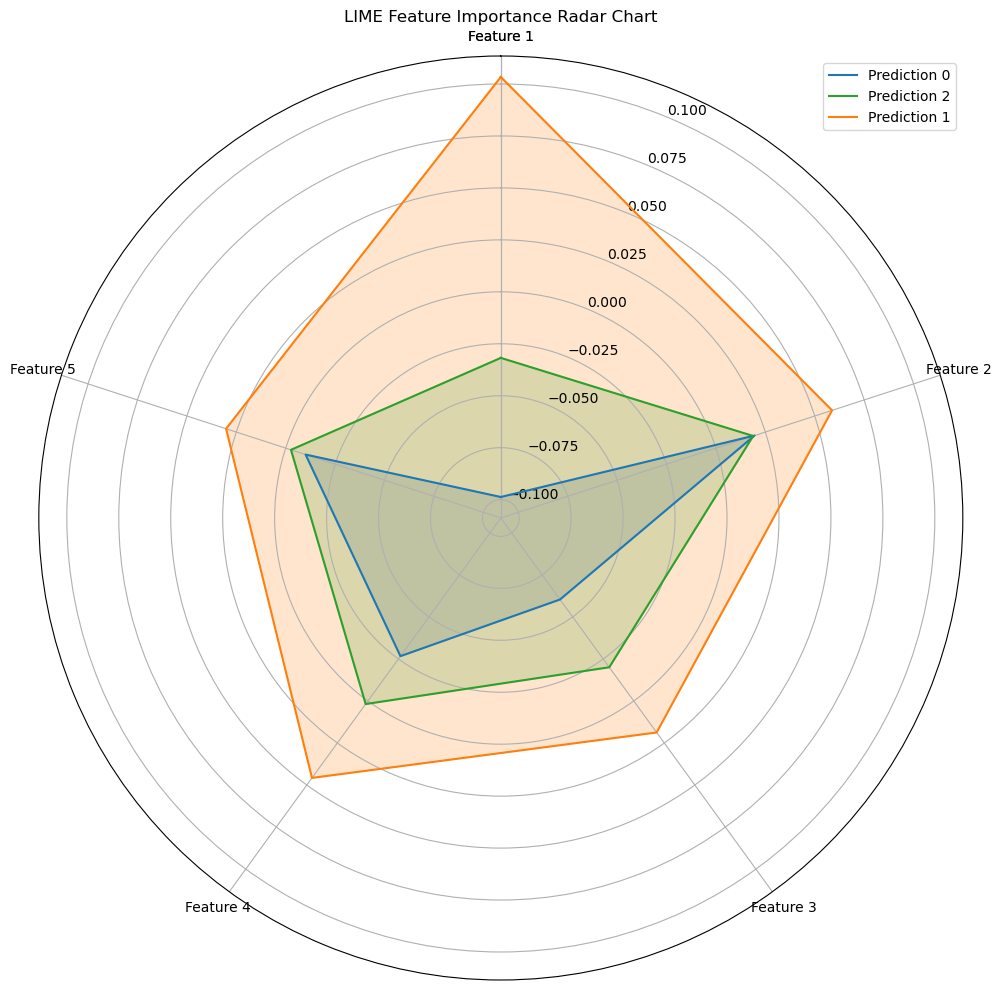

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a circular plot
plt.figure(figsize=(12, 12))
ax = plt.subplot(111, polar=True)

# Set the number of predictions
num_predictions = len(lime_results['Prediction'].unique())

# Iterate over the predictions
for prediction in lime_results['Prediction'].unique():
    prediction_data = lime_results[lime_results['Prediction'] == prediction]
    feature_scores = []
    for feature_col in ['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5']:
        feature_values = prediction_data[feature_col].str.split(': ', expand=True)
        feature_score = feature_values[1].astype(float).mean()
        feature_scores.append(feature_score)

    # Repeat the first score to close the radar chart
    feature_scores += feature_scores[:1]

    # Plot the feature scores as a radar chart
    angles = [n / float(len(feature_scores) - 1) * 2 * 3.14159265 for n in range(len(feature_scores))]
    ax.plot(angles, feature_scores, color=sns.color_palette()[int(prediction)], label=f"Prediction {prediction}")
    ax.fill(angles, feature_scores, alpha=0.2, color=sns.color_palette()[int(prediction)])

# Set the plot properties
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_xticks([n / float(len(feature_scores) - 1) * 2 * 3.14159265 for n in range(len(feature_scores))])
ax.set_xticklabels(["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5", "Feature 1"])  # Added extra label to close the loop
ax.set_title("LIME Feature Importance Radar Chart")
ax.legend()

plt.show()